# Small Cell Network: Parametrized MDP- MatricizedModel

### Problem Setting:

The system consists of $n$ nodes which receive cellular traffic. the data packets are routed to a central destination tower via intermediate small cell towers which are $f$ in number. at any incident node or intermediate cell-tower, we can decide the next facility/cell-tower for the data-packet. the __cost__ incurred in the action is equal to the physical distance between the incident node/cell-tower to the assigned cell-tower. The objective is to minimize the expected routing cost from any node to the destination, via selection of a optimal policy (i.e assignment of next cell-tower/destination from any tower/node) and optimizing the placement of intermediate cell-towers (cell-tower locations (x, y coordinates) are the paramaters of the model to be optimized).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools;
import math;
import scipy.io as scio;

n = 46; #number of initital nodes for data
f = 5; #number of resources/facilities/small-cell towers

V_VI = np.zeros((n+f+1));                                     #Initialisation of Value Function array for VI
V_new_VI = np.zeros((n+f+1));

V_MPI = np.zeros((n+f+1));                                     #Initialisation of Value Function array for MPI
V_new_MPI = np.zeros((n+f+1));

action = np.zeros((n+f+1));

# MDP model definition

### here we deifine the probability tranisiton model for the Small-cell optimization problem...

First we start with the definition of the state space for the model

from the problem defintion it is clear that the node, facility/cell-tower or destination location for the data-packet is the state of the system.

$s \in \{0\} := $ destination state

$s \in \{1, \ldots, f\} := $ cell-tower state

$s \in \{f+1,\ldots, n+f+1\} := $ node states

In [3]:
#define the state space and vectors here..
state_space = np.linspace(0, n+f, n+f+1, dtype = int)
state_space = [(s,) for s in state_space];
print(state_space)

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,), (29,), (30,), (31,), (32,), (33,), (34,), (35,), (36,), (37,), (38,), (39,), (40,), (41,), (42,), (43,), (44,), (45,), (46,), (47,), (48,), (49,), (50,), (51,)]


### Next we define the action space for the system.

Now for action space the definition is comparatively simple. Since we can control the next facility/cell-tower or destination that the data packet goes to (__not a node, only cell-towers or destination__), the action space is just the next fcell-tower/destination state index

$a \in \{0\} := $ goto destination

$a \in \{1, \ldots, f\} := $ goto cell-tower a


In [4]:
#define the action space of teh system...
act_space = np.linspace(0, f,f+1, dtype = int);
act_space = [(a,) for a in act_space];
print(act_space);

[(0,), (1,), (2,), (3,), (4,), (5,)]


In [5]:
act_mask = np.zeros(shape=(52, 6));
# print(smallcell1.setState(3));
# act_mask[0, smallcell1.get_actions()] = 1;
# act_mask[0]

With the state and action spaces defined, we now move forward to defining the system model.

## System Model definition

For the system, the model is quite simple. The action represents the next cell-tower/destination ower for the packet to be routed from the present state of the system. The transition of the system from one state to another is deterministic, i.e. action of routing of a packet from one state to the next results in the packet to the routed to the destined next state w.p. 1.

The difficult part is the cost of the routing, the cost of routing from one state to the next is defined as the physical distance between the concerned points. For the model, the nodes, cell-tower and destination positions are considered to be two-dimensional datapoints in space, of which, the node and destination points fixed whereas the cell-tower coordinates are the parameters which must also be optimized.




In [17]:
np.tile(np.expand_dims(np.eye(3,2), axis=0), (2,1,1)).shape

(2, 3, 2)

In [52]:
X = np.random.rand(4,2);
print(X)
print(2*(X @ X.T))
print(np.sum(X**2, axis=1, keepdims=True).T);
print(np.sum(X**2, axis=1, keepdims=True));
print(np.sum(X**2, axis=1, keepdims=True) + np.sum(X**2, axis=1, keepdims=True).T - 2*(X @ X.T))

[[0.73094052 0.62044795]
 [0.34031419 0.17748291]
 [0.84391094 0.31103418]
 [0.57260074 0.58282812]]
[[1.8384594  0.71773668 1.61965844 1.56030319]
 [0.71773668 0.29462787 0.68479624 0.59661238]
 [1.61965844 0.68479624 1.61785586 1.329007  ]
 [1.56030319 0.59661238 1.329007   1.33512045]]
[[0.9192297  0.14731393 0.80892793 0.66756023]]
[[0.9192297 ]
 [0.14731393]
 [0.80892793]
 [0.66756023]]
[[0.         0.34880695 0.10849919 0.02648674]
 [0.34880695 0.         0.27144562 0.21826178]
 [0.10849919 0.27144562 0.         0.14748116]
 [0.02648674 0.21826178 0.14748116 0.        ]]


In [595]:
a = np.random.rand(4,2);
print(a)
b = a.ravel();
print(b);
print(b.reshape(-1,2) ==a)

[[0.42571189 0.94769428]
 [0.96125266 0.37840825]
 [0.20860194 0.78796261]
 [0.13494136 0.25643332]]
[0.42571189 0.94769428 0.96125266 0.37840825 0.20860194 0.78796261
 0.13494136 0.25643332]
[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


In [327]:
a = np.random.rand(3,1); b = np.random.rand(1,3);
print(a); print(b);
a-b

[[0.82612227]
 [0.95074704]
 [0.80320629]]
[[0.64853196 0.80106008 0.73597251]]


array([[0.17759031, 0.02506219, 0.09014976],
       [0.30221508, 0.14968696, 0.21477453],
       [0.15467433, 0.00214621, 0.06723378]])

In [340]:
[a, b, c] = np.meshgrid(state_space, state_space, range(f*2));
print(c);

[[[0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  ...
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]]

 [[0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  ...
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]]

 [[0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  ...
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]]

 ...

 [[0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  ...
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]]

 [[0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  ...
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]]

 [[0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  ...
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]
  [0 1 2 ... 7 8 9]]]


In [946]:
#define the model here as a class
class SmallCellNet():

    #firstly define the data member for the model
    n: int; #number of nodes,
    f: int; #number of cell towers;
    nodeLocations: np.ndarray; #nx2 matrix including the node coordinates (fixed)
    cellLocations: np.ndarray; #nx2 matrix storing the cell-tower locations (changable)
    destinationLocation: np.ndarray; #1x2 matrix storing the destination location (fixed)#
    st:int;
    reward2cost:int;

    #define a probability transition matrix for the model.... (s,a) -> nextState
    P:np.ndarray;
    #define a cost function matrix for the transition (s,a) -> nextState
    C:np.ndarray;
    #define a gradient matrix wrt for each (s, a, s') for each parameters
    G:np.ndarray;
    #define a an action mask sxa dimensional matrix
    action_mask:np.ndarray;


    #define the constructor
    def __init__(self, n:int, f:int, locations_path:str, init_state = 0):
        '''
        function initializes the small cell network model.
        n: number of starting nodes,
        f: number of intermediate cell-towers
        location_path: path to a mat file to get the node, destination and initialize the cell tower locations
        '''

        #firstly set the number of states, facilities to the mentioned values
        self.n = n;
        self.f = f;
        #now load the mat file from the path and get the locations
        data = scio.loadmat(locations_path);
        #get the params
        para = data['para']; #using Amber's mat file of loactions for now.....TODO: Change this later to make more generic..
        #7th onwards are the nodes
        self.nodeLocations = para[6:, :];
        self.destinationLocation = np.array([[4., 7.]]);
        self.st = init_state;
        self.init_params(); #initialize parameters through the function

        #fnally define the state and action space for the model
        self.state_space = [(s,) for s in np.linspace(0, n+f, n+f+1, dtype = int)];
        self.action_space = [(a,) for a in np.linspace(0, f, f+1, dtype = int)];

        #finally initialize the probability, cost, action mask and gradient tensors..
        self.init_probab_matrix();
        self.init_cost_matrix();
        self.init_action_mask();
        self.init_grad_matrix();
    
    #define a function to inidialize the probability transition
    def init_probab_matrix(self): ##Exclusive to the matricized version of the algorithm
        '''
        function initializes the probability transition matrix for matriced algorithms
        probability transition matrix is sxaxs dimensional tensor (3d tensor)
        '''
        #start with an initial zeros matrix
        #now for any state action pair, we must assign the corresponding probability of going to the next state
        #w.p 0.9 goto the state mentioned in the action
        self.P = np.tile(np.expand_dims(np.eye(*self.act_space_shape(),*self.state_space_shape()), axis=0), (*self.state_space_shape(),1,1))*0.9;
        #and the destination gets an additional 0.1 probability....bcoz we goto destinaition with probability 0.1
        self.P[:,:,0] += 0.1;
        pass;
    
    #define a function to initialize the cost matrix
    def init_cost_matrix(self):
        #create the vector for the locations
        # X = np.vstack([self.destinationLocation, self.cellLocations, self.nodeLocations]); #nx2 matrix
        C_interm = np.sum(self.X**2, axis=1, keepdims=True) + np.sum(self.X**2, axis=1, keepdims=True).T - 2*(self.X @ self.X.T);
        C_interm[1:self.f+1,0] -= 50; #incentive to goto destination;
        # finally expand the cost function along the second dimentsion to replicate it for all the actions
        self.C = np.tile(np.expand_dims(C_interm, axis=1), (1, *self.act_space_shape(), 1));
        pass;
    
    #define a function to update cost matrix..after change of parameters
    def update_cost_matrix(self):
        
        C_interm = np.sum(self.X**2, axis=1, keepdims=True) + np.sum(self.X**2, axis=1, keepdims=True).T - 2*(self.X @ self.X.T);
        C_interm[1:self.f+1,0] -= 50; #incentive to goto destination;
        # finally expand the cost function along the second dimentsion to replicate it for all the actions
        self.C = np.tile(np.expand_dims(C_interm, axis=1), (1, *self.act_space_shape(), 1));
        pass;
    
    #define a function to iniitalize the gradient wrt parameters for each sxaxs combintation
    def init_grad_matrix(self):
        '''
        initialize the gradient w.r.t parameter tensor which is a state x action x nextState x parameter dimensional tensor..
        '''
        G = np.zeros(shape = (*self.state_space_shape(), * self.state_space_shape(), self.f*2)); #*self.act_space_shape()

        # [s, ns, p] = np.meshgrid(self.state_space, self.state_space, range(self.f*2))

        #lets loop through the states and parameters..
        for p in range(self.f):
            G[p+1,:,2*p] = (self.X[p+1,0] - self.X[:,0])*2;
            G[p+1,:,(2*p)+1] = (self.X[p+1,1] - self.X[:,1])*2;
            G[:,p+1,2*p] = (self.X[p+1,0] - self.X[:,0])*2;
            G[:,p+1,(2*p)+1] = (self.X[p+1,1] - self.X[:,1])*2;
        
        # for s in self.state_space:
        #     for ns in self.state_space:
        #         for p in range(self.f):
        #             G[(*s,*ns, (2*p))] = ((s[0]-1)==p)*(X[(*s,0)] - X[(*ns,0)])*2 + ((ns[0]-1)==p)*(X[(*ns,0)] - X[(*s,0)])*2; #gradient of x axis
        #             G[(*s,*ns, (2*p)+1)] = ((s[0]-1)==p)*(X[(*s,1)] - X[(*ns,1)])*2 + ((ns[0]-1)==p)*(X[(*ns,1)] - X[(*s,1)])*2; #gradient of x axis

        #now populate the required elements of the matrix
        self.G = np.tile(np.expand_dims(G, axis=1), (1, *self.act_space_shape(), 1, 1));
        pass;
    
    #define a function to update the gradient tensor
    def update_grad_matrix(self):
        '''
        Update the gradient w.r.t parameter tensor which is a state x action x nextState x parameter dimensional tensor..
        '''
        G = np.zeros(shape = (*self.state_space_shape(), * self.state_space_shape(), self.f*2)); #*self.act_space_shape()

        # [s, ns, p] = np.meshgrid(self.state_space, self.state_space, range(self.f*2))

        for p in range(self.f):
            G[p+1,:,2*p] = (self.X[p+1,0] - self.X[:,0])*2;
            G[p+1,:,(2*p)+1] = (self.X[p+1,1] - self.X[:,1])*2;
            G[:,p+1,2*p] = (self.X[p+1,0] - self.X[:,0])*2;
            G[:,p+1,(2*p)+1] = (self.X[p+1,1] - self.X[:,1])*2;
        
        #lets loop through the states and parameters..
        # for s in self.state_space:
        #     for ns in self.state_space:
        #         for p in range(self.f):
        #             G[(*s,*ns, (2*p))] = ((s[0]-1)==p)*(X[(*s,0)] - X[(*ns,0)])*2 + ((ns[0]-1)==p)*(X[(*ns,0)] - X[(*s,0)])*2; #gradient of x axis
        #             G[(*s,*ns, (2*p)+1)] = ((s[0]-1)==p)*(X[(*s,1)] - X[(*ns,1)])*2 + ((ns[0]-1)==p)*(X[(*ns,1)] - X[(*s,1)])*2; #gradient of x axis

        #now populate the required elements of the matrix
        self.G = np.tile(np.expand_dims(G, axis=1), (1, *self.act_space_shape(), 1, 1));
        pass;
    
    #define function to get the shape of hte state and action space
    def state_space_shape(self):
        return (self.n + self.f + 1,);
    
    #define a function to get the sacyion space dimensions
    def act_space_shape(self):
        return (self.f+1,);
    
    #define a function to initialize the parameters for the model
    def init_params(self):
        #initialize the model parametrs to all zeros
        self.cellLocations = np.zeros(shape=(self.f, 2));
        self.X = np.vstack([self.destinationLocation, self.cellLocations, self.nodeLocations]); #nx2 matrix
        pass;
    
    #define a function to get the parameters for the model
    def parameters(self) -> np.ndarray:

        '''
        function returns a list of parameters for the system.
        '''

        #return the cell locations as the parameters list. each coordinate is a scalar parameter..
        return self.cellLocations.reshape(-1);
    
    #define a function to update the parameters to a new value
    def update_params(self, params: np.ndarray):
        '''
        function to udate the list of paramaters for the model to a new set of parameters
        params: updated list f parameters of the same length and shape of elements as in self.parameters()
        return :
        None
        '''

        #firstly check if the number of parameters in the list match
        assert(params.shape == self.parameters().shape);

        #now go over each parameter in the list and update the corresponding model parameter
        # for i in range(len(params)):
        #     #assign the correspondin parameter after checking the dimension
        #     # in this case of small cell network every parameter element is a coordinate in the cellLocations matrix.
        #     # assert(params[i].shape == 1);
        #     self.cellLocations[int(i/2), i%2] = params[i];
        
        self.cellLocations = params.reshape(-1,2);

        #before updating the cost and gradient tensors...update the self.X vector with the updated parameters.
        self.X[1:self.f+1,:] = self.cellLocations;

        #once parameters are updated...update the cost and gradient tensors for the model..
        self.update_cost_matrix();
        self.update_grad_matrix();

        pass;
    
    #define a function to set the system state
    def setState(self, state):
        #just set the state
        assert((state <= self.n + self.f) & (state>=0));
        self.st = state;
        pass;
    
    def state(self):
        return (self.st,);
    
    #define a function to list the avaiable action for the state
    def get_actions(self):
        '''
        return:
        action_list: list of actions available for the present state of the system
        '''
        #here the action list is independent of the state that one is in, except for the the destination state, wherein the only
        # avaiable action is to stay there
        action_list =[(0,)];

        if(self.st == 0):
            #only zero is the action possible at 0
            return [(0,)];
        else:
            #return the entire action space for the model
            test = self.action_space.copy();
            if((self.st>=1)&(self.st<=self.f)):
                test.remove((self.st,));
            else:
                test.remove((0,)); #cannot go from node directly to destination
            return test;
    
    #define a functino to define the action mask for the model....for matricized implementation
    def init_action_mask(self): #Specifically for matricized implementation...
        '''
        function initializes the action mask for the model....i.e the boolean tensor of state x action dimensions to represent
        allowable action from the model..
        '''
        self.action_mask = np.ones(shape = (*self.state_space_shape(), *self.act_space_shape()));
        self.action_mask[self.f+1:, 0] = 0; #cannot go from any node directly to the destination
        self.action_mask[0,:] = 0; self.action_mask[0,0] = 1; #only action allowed at destination is the destination itself..
        self.action_mask[1:self.f+1, 1:self.f+1] -= np.eye(self.f, self.f); # from any facility location self-loop is not possible
        pass;
    
    #next define the function to step from a given state to the using the actions and probabilities of arrival/departure events..
    def step(self, act) -> list:

        '''
        act: action on the state to direct to the next state...,

        returns:
        state_prob_dict_array: an array dictionary of possible next states for the system, the corresponding reward and the
        associated probability of transition to those states. also a list with the gradient of the cost/reward w.r.t parameters (in same order as parameters) is returned
        if parameters are present else an empty list is returned.
        '''

        assert((act >= 0) & (act <= self.f));

        #the model is deterministic, hence the stepping action leads to one state w.p. 1

        #firstly check the whether the action can be performed
        if(self.st == 0):
            #the model is at terminal state, thus w.p. 1 the next state is the terminal state itself, cost is zero and
            # the gradient w.r.t parameters is also zero
            return [[(0,), 0, 1, [0]*(2*self.f)]];
        
        else:

            #now, there is actually some state transition and costs associated with the transition

            grads = [0]*(2*self.f);

            #the starting state is the present state, thus at the 
            prosp_state = act; #the action is the prospective state
            p = 0.9; #probablity 1
            #determine the cost at the squared 2-norm between the two point
            if(self.st >= self.f+1):
                pt1 = self.nodeLocations[self.st - self.f - 1, :];
                #no gradient wrt node location
                g1 = -1;
            elif((self.st >= 1)&(self.st <= self.f)):
                pt1 = self.cellLocations[self.st-1, :]; #a cell location is the present state
                #gradient w.r.t cell location is present
                g1 = self.st-1;
            else:
                pt1 = self.destinationLocation[0, :];
                g1 = -1;
            
            #same for next point..no check w.r.t node location because its not in the action space
            if((prosp_state >= 1)&(prosp_state <= self.f)):
                pt2 = self.cellLocations[prosp_state-1, :]; #a cell location is the next state
                #gradient w.r.t cell location is present
                g2 = prosp_state-1;
            else:
                pt2 = self.destinationLocation[0, :];
                g2 = -1;
            
            if(g1!=-1):
                grads[2*g1] = 2*(pt1[0] - pt2[0]); grads[(2*g1)+1] = 2*(pt1[1] - pt2[1]);
            if(g2!=-1):
                grads[2*g2] = 2*(pt2[0] - pt1[0]); grads[(2*g2)+1] = 2*(pt2[1] - pt1[1]);
            
            #and the cost is the euclidean norm
            cost = np.linalg.norm(pt1-pt2, 2)**2;
            if((prosp_state == 0)&(self.st >= 1)&((self.st <= self.f))):
                cost -= 50;

            state_prob_dict = [[(prosp_state,), cost, p, grads]];

            #with small probability.... goto destination
            grads = [0]*(2*self.f);

            #the starting state is the present state, thus at the 
            prosp_state = 0; #the action is the prospective state
            p = 0.1; #probablity 0.1
            #determine the cost at the squared 2-norm between the two point
            if(self.st >= self.f+1):
                pt1 = self.nodeLocations[self.st - self.f - 1, :];
                #no gradient wrt node location
                g1 = -1;
            elif((self.st >= 1)&(self.st <= self.f)):
                pt1 = self.cellLocations[self.st-1, :]; #a cell location is the present state
                #gradient w.r.t cell location is present
                g1 = self.st-1;
            else:
                pt1 = self.destinationLocation[0, :];
                g1 = -1;
            
            #same for next point..nothing doing, its the destination
            pt2 = self.destinationLocation[0, :];
            g2 = -1;
            
            if(g1!=-1):
                grads[2*g1] = 2*(pt1[0] - pt2[0]); grads[(2*g1)+1] = 2*(pt1[1] - pt2[1]);
            if(g2!=-1):
                grads[2*g2] = 2*(pt2[0] - pt1[0]); grads[(2*g2)+1] = 2*(pt2[1] - pt1[1]);
            
            #and the cost is the euclidean norm
            cost = np.linalg.norm(pt1-pt2, 2)**2;
            if((prosp_state == 0)&(self.st >= 1)&((self.st <= self.f))):
                cost -= 50;

            state_prob_dict.append([(prosp_state,), cost, p, grads]);

            return state_prob_dict;


In [947]:
smallcell1 = SmallCellNet(46, 5, "E:\\mustafa\\_Btech mech\\Salapaka Reseach Group\\Matlab\\ParaMDP\\para3.mat");
print(smallcell1.X.shape)
print(smallcell1.state())
smallcell1.setState(10)
print(smallcell1.get_actions());
print(smallcell1.cellLocations[3])
print(smallcell1.step(0));
smallcell1.init_probab_matrix();
smallcell1.init_cost_matrix();
smallcell1.init_action_mask();
# print(np.sum(smallcell1.P, axis=-1));
print(smallcell1.C.shape);
print(smallcell1.action_mask.shape);
print(smallcell1.G[0,0,5])

(52, 2)
(0,)
[(1,), (2,), (3,), (4,), (5,)]
[0. 0.]
[[(0,), 26.63411463483864, 0.9, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [(0,), 26.63411463483864, 0.1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
(52, 6, 52)
(52, 6)
[  0.   0.   0.   0.   0.   0.   0.   0.  -8. -14.]


In [948]:
smallcell1.init_params();
test = smallcell1.parameters();
print(test);

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
test = [i for i in range(len(test))];
print(test);
smallcell1.update_params(test);
print(smallcell1.parameters());

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [63]:
smallcell1.cellLocations

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]])

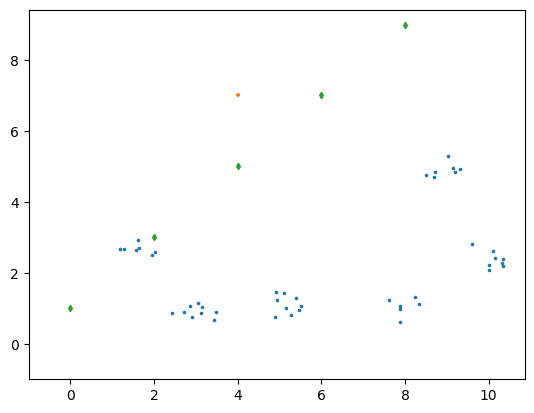

In [67]:
plt.scatter(smallcell1.nodeLocations[:, 0], smallcell1.nodeLocations[:, 1], marker='.', s = 10);
plt.scatter(smallcell1.destinationLocation[:,0], smallcell1.destinationLocation[:,1], marker = '+', s = 10);
plt.scatter(smallcell1.cellLocations[:,0], smallcell1.cellLocations[:,1], marker = 'd', s = 10);
plt.xlim(-1,); plt.ylim(-1,);

# Define the Optimizaton Routine.
With the GPU system model defined, we now define the optimization routines for the model using value and modified policy iteration.

## Value Iteration
For Value Iteration, the method requires an initial estimate of the value function, the state space and the action space for optimization.
The initial value function must be of the same dimension as that of the state space.

In [282]:
#define the value iteration routine 
def valueIteration(model:SmallCellNet, initValue:np.ndarray, state_space:list, action_space:list, gamma:float, n_iters:int, allow_print = True) -> list:

    '''
    params:
    model: The system model instance on whhcih value iteration is to be carried out.
    initValue: initial Assumption/estimate of the value function
    state space: state_space tensor (list) of the same diension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    n_iters: number of iterations of value iteration optimization on the model.
    return:
    finalValue: result of hte value iteration on the model.
    finalPolicy: optimized policy after value iteration on the model.
    train_params: evolution of parameters of concern during training iterations
    '''

    #start with the the value function and extract the dimensions of the states
    # assert(model.max_job1+1 == initValue.shape[0]); assert(model.max_job2+1 == initValue.shape[1]);
    # assert(initValue.shape[2] == 3); assert(initValue.shape[3] == 3);
    assert(initValue.shape ==  model.state_space_shape());

    #now go ahead and carry out the iterations of value iteration
    finalValue = initValue.copy();
    finalPolicy = np.zeros(shape=(*model.state_space_shape(), *(1,)*len(model.act_space_shape())), dtype=int);
    train_params = {};
    norm_diff = [];

    for iter in range(n_iters):

        prev_Val=finalValue.copy();
        #for each iteration..go through each state and update the value function according to the optimal bellman operator applied on the value function for that state.
        #loop through the states.
        for state in state_space:
            #go ahead and set the state of the system to the said state..
            model.setState(*state);

            #now get the avaiable actions for the model at that state..
            act_space = model.get_actions();
            #go ahead and apply the optimal bellman operator at this state. i.e determine the optimal action and value function for this state
            maxVal = 0; maxAct = act_space[0];
            for action in act_space:
                nextStates = model.step(*action);
                reward = sum([r for [s, r, p, g] in nextStates])/len(nextStates);
                #calculate the expected value over reward and next states using the result..
                val = reward + gamma*sum([p*prev_Val[s] for [s, r, p, g] in nextStates]);
                if(val> maxVal):
                    maxVal= val; maxAct = action;
            
            #finally update the value function for the state..
            finalValue[state] = maxVal;
            finalPolicy[state] = maxAct;
        
        #repeat
        norm_diff.append(np.max(abs(finalValue - prev_Val)));
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]}', end='\n');
    
    train_params['norm_diff'] = norm_diff;
    #finally return the final value function and policy to the output
    return ([finalValue, finalPolicy, train_params]);




## Q-function iteration with MEP (Known MDP)

Here we carry out the fixed point iterations for the optimal bellman operator obtained for optimal solution for MDP with maximized entropy. The objective of the optimization problem is to __minimize__ the expected discounted sum of costs over the trajectory through the policy, while maximizing the entopy of the state-action path. The resulting fixed point equation to be solved is as follows.

$ \Lambda_{\beta}(s,a) = (T\Lambda_{\beta})(s,a) $

where T is the optimal bellman operator, given as,

$ (T\Lambda_{\beta})(s,a) = \sum\limits_{s' \in \mathscr{S}} \left[ p_{ss'}^{a} \left( c_{ss'}^{a} + \frac{\gamma}{\beta}log(p_{ss'}^{a}) \right) \right] -\frac{\gamma^{2}}{\beta} \sum\limits_{s' \in \mathscr{S}} p_{ss'}^{a} log\left[ \sum\limits_{a' \in \mathscr{A}} exp\left\lbrace \frac{-\beta}{\gamma}\Lambda_{\beta}(s',a') \right\rbrace \right] $

Now, to account for actions that cannot be performed at a particular state, the above expression is augmented with the action mask $M(.,.)$ in all operations to eliminate the effect of prohibited actions based on states

$ (T\Lambda_{\beta})(s,a) = M(s, a) \left( \sum\limits_{s' \in \mathscr{S}} \left[ p_{ss'}^{a} \left( c_{ss'}^{a} + \frac{\gamma}{\beta}log(p_{ss'}^{a}) \right) \right] -\frac{\gamma^{2}}{\beta} \sum\limits_{s' \in \mathscr{S}} p_{ss'}^{a} log\left[ \sum\limits_{a' \in \mathscr{A}} M(s', a') exp\left\lbrace \frac{-\beta}{\gamma}\Lambda_{\beta}(s',a') \right\rbrace \right] \right) $

In [101]:
a = np.ones(shape=(3,3,2)); a[:,:,1]=0.5;
b = np.array([[1, 2],[1, 3],[0.5, 2]]);
np.tensordot(a, b, axes=2)

(-1,)

In [115]:
a = np.log(np.eye(3,3)); print(a);
a[a == -np.inf] =0;
print(a);

[[  0. -inf -inf]
 [-inf   0. -inf]
 [-inf -inf   0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


c:\Users\Mustafa\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [951]:
#define the Q iteration routine 
def QIteration(model:SmallCellNet, initValue:np.ndarray, state_space:list, action_space:list, gamma:float, beta:float, n_iters:int, allow_print = True, reward2cost:int=-1) -> list:

    '''
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    initValue: initial Assumption/estimate of the value function
    state space: state_space tensor (list) of the same diension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    beta: entropy maximization weightage factor
    n_iters: number of iterations of value iteration optimization on the model.
    reward2cost: factor to specify reward/cost model. Use 1 for cost model and -1 for reward model. Default = -1
    return:
    finalValue: result of hte value iteration on the model.
    finalPolicy: optimized policy after value iteration on the model.
    train_params: evolution of parameters of concern during training iterations
    '''

    #start with the the value function and extract the dimensions of the states
    # assert(model.max_job1+1 == initValue.shape[0]); assert(model.max_job2+1 == initValue.shape[1]);
    # assert(initValue.shape[2] == 3); assert(initValue.shape[3] == 3); assert(initValue.shape[4] == 2);
    assert(initValue.shape ==  (*model.state_space_shape(), *model.act_space_shape()));

    #now go ahead and carry out the iterations of value iteration
    finalValue = initValue.copy();
    # action_mask = np.zeros(shape = (*model.state_space_shape(), *model.act_space_shape()));
    # finalPolicy = np.zeros(shape=model.state_space_shape(), dtype=int);
    train_params = {};
    norm_diff = [];

    for iter in range(n_iters):

        prev_Val=finalValue.copy();

        #for each iteration...instead of the searized approach....just get the probability transition tensor from the model and the cost tensor
        #also get the action mask tensor from the model for use in the policy determination
        #firstly get hold of the probability and cost tensors..and use that to compute the unsummed first term
        l = np.log(model.P); l[l == -np.inf]=0;
        term1 = model.P * ( model.C + (gamma/beta)*l); #this is the first term without summation over next states
        term1 = np.sum(term1, axis=tuple(-1*np.arange(1,len(model.state_space_shape())+1))); #summation over the next states...

        #now go ahead and compute the second term
        #fir term 2 ...first compute the inner summation over next states and actions of the exponent of Q function
        tv = finalValue.copy(); tv[model.action_mask == 0] = np.inf;
        me = np.min(tv, axis = tuple(-1*np.arange(1,len(model.act_space_shape())+1)), keepdims=True);
        e = model.action_mask * (finalValue - me); #Something to think at....how can we offset better?
        term2 = model.action_mask * np.exp((-beta/gamma)*e);
        term2 = term2;
        term2 = np.sum(term2, axis=tuple(-1*np.arange(1,len(model.act_space_shape())+1))); #summation over possible next actions
        term2 = np.log(term2) + (-beta/gamma)*np.squeeze(me, axis=1); #
        term2 = np.tensordot(model.P, term2, axes=len(model.state_space_shape())); #product with corresponding probability and summation over next states
        term2 = term2 * ((gamma**2) /beta); #coefficient multiplication..

        #now combine the terms...and mask out using the action mask..to get the updated Q function
        finalValue = model.action_mask * (term1 - term2);
        
        #repeat
        norm_diff.append(np.max(abs(finalValue - prev_Val)));
        norm = np.max(abs(finalValue));
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]}', end='\n');
        
        #finally check condition for convergence of optimal Q function and stop iteration if met
        if( norm_diff[-1]/norm < 1e-10):
            #condition met
            if(allow_print):
                print(f'\nPolicy and Params:\tfor Q, {norm_diff[-1]/norm} < 1e-10, Hence stopping QIteration');
            break;
    
    #finally after the iterations get the converged policy from the Q-function fixed point obtained..
    expo = np.exp((-beta/gamma) * (finalValue - np.min(finalValue, axis= tuple(-1*np.arange(1,len(model.act_space_shape())+1)), keepdims=True)))*model.action_mask ;#exponent of the q-function to get the final policy...
    sumexpo = np.sum(expo, axis=-1, keepdims= True);
    finalPolicy = expo/sumexpo;
    
    train_params['norm_diff'] = norm_diff;
    #finally return the final value function and policy to the output
    return ([finalValue, finalPolicy, train_params]);

In [69]:
#define the Q iteration routine 
def QIteration_backup(model:SmallCellNet, initValue:np.ndarray, state_space:list, action_space:list, gamma:float, beta:float, n_iters:int, allow_print = True, reward2cost:int=-1) -> list:

    '''
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    initValue: initial Assumption/estimate of the value function
    state space: state_space tensor (list) of the same diension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    beta: entropy maximization weightage factor
    n_iters: number of iterations of value iteration optimization on the model.
    reward2cost: factor to specify reward/cost model. Use 1 for cost model and -1 for reward model. Default = -1
    return:
    finalValue: result of hte value iteration on the model.
    finalPolicy: optimized policy after value iteration on the model.
    train_params: evolution of parameters of concern during training iterations
    '''

    #start with the the value function and extract the dimensions of the states
    # assert(model.max_job1+1 == initValue.shape[0]); assert(model.max_job2+1 == initValue.shape[1]);
    # assert(initValue.shape[2] == 3); assert(initValue.shape[3] == 3); assert(initValue.shape[4] == 2);
    assert(initValue.shape ==  (*model.state_space_shape(), *model.act_space_shape()));

    #now go ahead and carry out the iterations of value iteration
    finalValue = initValue.copy();
    action_mask = np.zeros(shape = (*model.state_space_shape(), *model.act_space_shape()));
    finalPolicy = np.zeros(shape=model.state_space_shape(), dtype=int);
    train_params = {};
    norm_diff = [];

    for iter in range(n_iters):

        prev_Val=finalValue.copy();
        #for each iteration..go through each state and update the value function according to the optimal bellman operator applied on the value function for that state.
        #loop through the states.
        for state in state_space:
            #go ahead and set the state of the system to the said state..
            model.setState(*state);

            #now get the avaiable actions for the model at that state..
            act_space = model.get_actions();
            action_mask[state, act_space]=1;
            #go ahead and apply the optimal bellman operator at this state. i.e determine the optimal Q function for this state
            for action in act_space:
                nextStates = model.step(*action);

                #update the Q function value for the state-action pair..to do so..go through all possible next states and actions and
                #get the terms in the optimal bellman operator
                term1 = 0; term2 = 0;
                for [ns, r, p, g] in nextStates:
                    ##cost is negation of the reward...
                    term1 += p * ( (reward2cost*r) + (gamma/beta)*(math.log(p) if p>0 else 0.) );
                    term2a = 0;
                    minterm2a = np.min(prev_Val);
                    for na in action_space:
                        term2a += math.exp((-beta/gamma)*(prev_Val[(*ns, *na)] - minterm2a));
                    term2 += p * (math.log(term2a) + (-beta/gamma)*minterm2a );
                
                #finally update the state action q-function value using the terms 1 and 2
                finalValue[(*state, *action)] = term1 - ((gamma**2)/beta)*term2;
            
            #finally update the value function for the state..
            # finalValue[state] = maxVal;
            # finalPolicy[state] = maxAct;
        
        #repeat
        norm_diff.append(np.max(abs(finalValue - prev_Val)));
        norm = np.max(abs(finalValue));
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]}', end='\n');
        
        #finally check condition for convergence of optimal Q function and stop iteration if met
        if( norm_diff[-1]/norm < 1e-10):
            #condition met
            if(allow_print):
                print(f'\nPolicy and Params:\tfor Q, {norm_diff[-1]/norm} < 1e-10, Hence stopping QIteration');
            break;
    
    #finally after the iterations get the converged policy from the Q-function fixed point obtained..
    expo = np.exp((-beta/gamma) * (finalValue - np.min(finalValue)))*action_mask ;#exponent of the q-function to get the final policy...
    sumexpo = np.sum(expo, axis=-1, keepdims= True);
    finalPolicy = expo/sumexpo;
    
    train_params['norm_diff'] = norm_diff;
    #finally return the final value function and policy to the output
    return ([finalValue, finalPolicy, train_params]);

### G-Iteration for parameter update

Here we define a function to perform bellman operator to determine the fixed point of the gradient of cost w.r.t parameters. The objective is to obtain the fixed point of the gradient bellman equation according to eq 24 in the paraMDP paper by amber srivastava.

The bellman operator for the action-dependent gradient function is as follows

$\left[TK_{\eta}^{\beta}\right](s, a) = \sum\limits_{s'} p_{ss'}^{a} \left[ \frac{\partial c_{ss'}^{a}}{\partial \eta} + \gamma G_{\eta}^{\beta}(s') \right]$

$ G_{\eta}^{\beta}(s) =  \sum\limits_{a \in \mathscr{A}} \mu(a|s) K_{\eta}^{\beta}(s,a) $

Thus,

$K_{\eta}^{\beta}(s, a) = \left[TK_{\eta}^{\beta}\right](s, a) $

$\implies  G_{\eta}^{\beta}(s) =  \sum\limits_{a \in \mathscr{A}} \mu(a|s) K_{\eta}^{\beta}(s,a) = \sum\limits_{a \in \mathscr{A}} \mu(a|s) \left[TK_{\eta}^{\beta}\right](s, a)$

$\therefore G_{\eta}^{\beta}(s) = \sum\limits_{a \in \mathscr{A}} \mu(a|s) \sum\limits_{s'} p_{ss'}^{a} \left[ \frac{\partial c_{ss'}^{a}}{\partial \eta} + \gamma G_{\eta}^{\beta}(s') \right] $



In [955]:
#define the G iteration routine
def GIteration(model:SmallCellNet, initValue:np.ndarray, policy:np.ndarray, state_space:list, action_space:list, gamma:float, beta:float, n_iters:int, allow_print = True, reward2cost:int=-1) -> list:

    '''
    function to determine the fixed point of the gradient function from the gradient bellman equation for each of the model parameters..
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    initValue: initial Assumption/estimate of the Gradient function (this is copied over for each model paramater)
    policy: Policy (probabilistic) on which the fixed point of the gradient vector is to be determined
    state space: state_space tensor (list) of the same diension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    beta: entropy maximization weightage factor
    n_iters: number of iterations of value iteration optimization on the model.
    return:
    finalValue: list of the Gradient function for each of the model parameters,
    '''

    #start with the the value function and extract the dimensions of the states
    # assert(model.max_job1+1 == initValue.shape[0]); assert(model.max_job2+1 == initValue.shape[1]);
    # assert(initValue.shape[2] == 3); assert(initValue.shape[3] == 3); assert(initValue.shape[4] == 2);
    assert(initValue.shape ==  model.state_space_shape());
    assert(model.parameters().shape != (0,));
    assert(policy.shape == (*model.state_space_shape(), *model.act_space_shape()));

    #now go ahead and carry out the iterations of value iteration
    # finalValue = [initValue.copy()]*len( model.parameters());
    finalValue = np.tile(np.expand_dims(initValue, axis=-1), len(model.parameters()));
    train_params = {};
    norm_diff = [];

    s = len(model.state_space_shape());
    sa = len(model.state_space_shape()) + len(model.act_space_shape());
    sas = sa + len(model.state_space_shape());

    for iter in range(n_iters):

        prev_Val=finalValue.copy();
        
        #now implement the matricized version of the algorithm..
        #firstly get the next state and parameter G function and expand dimensions
        G_t = np.expand_dims(finalValue, axis= tuple(np.arange(0,len(model.state_space_shape())+len(model.act_space_shape()))) );
        #now get the gradient tensor from the model and combine it with the gradient function
        G_t = model.G + (gamma * G_t);
        #now combine it with the probability transition tensor...expanded dims to include parameters
        G_t = np.expand_dims(model.P,axis=-1) * G_t;
        #now summup over the next states...
        G_t = np.sum(G_t, axis= tuple(np.arange(sa, sas)) );
        #noe combine with the policy by expanding policy dimensions to account for parameters axis
        G_t = np.expand_dims(policy, axis=-1) * G_t;
        #finally summup over the possible actions...
        finalValue = np.sum(G_t, axis= tuple(np.arange(s, sa)));
        


        # #for each iteration..go through each state and update the value function according to the optimal bellman operator applied on the value function for that state.
        # #loop through the states.
        # for state in state_space:
        #     #go ahead and set the state of the system to the said state..
        #     model.setState(*state);

        #     #now get the avaiable actions for the model at that state..
        #     act_space = model.get_actions();
        #     #go ahead and apply the optimal bellman operator at this state. i.e determine the G function bellman operator value for this state
        #     term = np.zeros(shape=(len(model.parameters())));
        #     for action in act_space:
        #         nextStates = model.step(*action);
        #         polval = policy[(*state, *action)]; #probability of action given state according to the policy

        #         #update the Q function value for the state-action pair..to do so..go through all possible next states and actions and
        #         #get the terms in the optimal bellman operator
        #         for [ns, r, p, g] in nextStates:
        #             ##cost is negation of the reward...
        #             #doing the bellman operator update for each of the parameters
        #             for p_ind in range(len(model.parameters())):
        #                 term[p_ind] += (polval * p) * ( (reward2cost*g[p_ind]) + (gamma)*prev_Val[(*ns, p_ind)] );
            
        #     #finally update the value function for the state..
        #     finalValue[state] = term;
        #     # for p_ind in range(len(model.parameters())):
        #     #     finalValue[p_ind][state] = term[p_ind];
        #     # finalPolicy[state] = maxAct;
        
        #repeat
        norm_diff.append(np.max(abs(finalValue - prev_Val)));
        norm = np.max(abs(finalValue));
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]}', end='\r');
        
        #finally check condition for convergence of optimal Q function and stop iteration if met
        if( norm_diff[-1]/norm < 1e-5):
            #condition met
            if(allow_print):
                print(f'\nPolicy and Params:\tfor G, {norm_diff[-1]/norm} < 1e-5, Hence stopping GIteration');
            break;
    
    train_params['norm_diff'] = norm_diff;
    #finally return the final value function and policy to the output
    return ([finalValue, train_params]);

In [77]:
#define the G iteration routine 
def GIteration_backup(model:SmallCellNet, initValue:np.ndarray, policy:np.ndarray, state_space:list, action_space:list, gamma:float, beta:float, n_iters:int, allow_print = True, reward2cost:int=-1) -> list:

    '''
    function to determine the fixed point of the gradient function from the gradient bellman equation for each of the model parameters..
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    initValue: initial Assumption/estimate of the Gradient function (this is copied over for each model paramater)
    policy: Policy (probabilistic) on which the fixed point of the gradient vector is to be determined
    state space: state_space tensor (list) of the same diension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    beta: entropy maximization weightage factor
    n_iters: number of iterations of value iteration optimization on the model.
    return:
    finalValue: list of the Gradient function for each of the model parameters,
    '''

    #start with the the value function and extract the dimensions of the states
    # assert(model.max_job1+1 == initValue.shape[0]); assert(model.max_job2+1 == initValue.shape[1]);
    # assert(initValue.shape[2] == 3); assert(initValue.shape[3] == 3); assert(initValue.shape[4] == 2);
    assert(initValue.shape ==  model.state_space_shape());
    assert(model.parameters() != []);
    assert(policy.shape == (*model.state_space_shape(), *model.act_space_shape()));

    #now go ahead and carry out the iterations of value iteration
    # finalValue = [initValue.copy()]*len( model.parameters());
    finalValue = np.tile(np.expand_dims(initValue, axis=-1), len(model.parameters()));
    train_params = {};
    norm_diff = [];

    for iter in range(n_iters):

        prev_Val=finalValue.copy();
        #for each iteration..go through each state and update the value function according to the optimal bellman operator applied on the value function for that state.
        #loop through the states.
        for state in state_space:
            #go ahead and set the state of the system to the said state..
            model.setState(*state);

            #now get the avaiable actions for the model at that state..
            act_space = model.get_actions();
            #go ahead and apply the optimal bellman operator at this state. i.e determine the G function bellman operator value for this state
            term = np.zeros(shape=(len(model.parameters())));
            for action in act_space:
                nextStates = model.step(*action);
                polval = policy[(*state, *action)]; #probability of action given state according to the policy

                #update the Q function value for the state-action pair..to do so..go through all possible next states and actions and
                #get the terms in the optimal bellman operator
                for [ns, r, p, g] in nextStates:
                    ##cost is negation of the reward...
                    #doing the bellman operator update for each of the parameters
                    for p_ind in range(len(model.parameters())):
                        term[p_ind] += (polval * p) * ( (reward2cost*g[p_ind]) + (gamma)*prev_Val[(*ns, p_ind)] );
            
            #finally update the value function for the state..
            finalValue[state] = term;
            # for p_ind in range(len(model.parameters())):
            #     finalValue[p_ind][state] = term[p_ind];
            # finalPolicy[state] = maxAct;
        
        #repeat
        norm_diff.append(np.max(abs(finalValue - prev_Val)));
        norm = np.max(abs(finalValue));
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]}', end='\r');
        
        #finally check condition for convergence of optimal Q function and stop iteration if met
        if( norm_diff[-1]/norm < 1e-5):
            #condition met
            if(allow_print):
                print(f'\nPolicy and Params:\tfor G, {norm_diff[-1]/norm} < 1e-5, Hence stopping GIteration');
            break;
    
    train_params['norm_diff'] = norm_diff;
    #finally return the final value function and policy to the output
    return ([finalValue, train_params]);

## Parameter update via gradient decent

Now we define a routine to optimize the paramaters via gradient decent

The parameters are optimized using gradient decent where the gradient w.r.t parameters is obtained as the fixed point solution of GIteration for the latest updated value of the parameters. Hence the slgorithm of determning the optimal parameters for the given policy consists of the following steps:

Until Convergence

1. for parameter estimates $\eta_{k}$ and given policy, obtain the fixed point of the gradient bellman equation $G_{\eta_{k}}^{\beta}$ using GIteration

2. Update parameter values using gradient descent

$ \eta_{k+1} = \eta_{k} - \epsilon_{k} \sum\limits_{s\in\mathscr{S}} G_{\eta_{k}}^{\beta}(s) $

3. $k \leftarrow k+1$

In [958]:
#define parameter gradient descent optimization routine here
def optimizeParams(model:SmallCellNet, initValue:np.ndarray, policy:np.ndarray, state_space:list, action_space:list, gamma:float, beta:float, epsilon:float, n_iters:int, gd_iters:int, allow_print = True, reward2cost:int=-1) -> dict:

    '''
    Function performs gradient descent optimization for the parameters of the model for a fixed policy by determination of gradient fixed points
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    initValue: initial Assumption/estimate of the Gradient function (this is copied over for each model paramater)
    policy: Policy (probabilistic) on which the fixed point of the gradient vector is to be determined
    state_space: state_space tensor (list) of the same dimension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    beta: entropy maximization weightage factor
    epsilon: learning rate for gradient descent
    n_iters: number of iterations of gradient fixed point iteration on the model.
    gd_iters: number of gradient descent iterations
    reward2cost: conversion factor for conversion of reward model to cost model (-1 for reward model, 1 for cost model) >Default = -1
    '''

    #firstly get the lis of model parameters and assert if there are model parameters to optimize
    assert(model.parameters().shape != (0,));

    train_params = {};
    norm_diff = [];
    norm= [] 

    #now just start the gradient descent iterations
    G_prev = np.zeros(shape = (*model.state_space_shape(), len(model.parameters())));
    for iter in range(gd_iters):

        #in each iteration, compute the fixed point of the gradient using GIteration for the present value of the parameters
        [G, _]= GIteration(model, initValue, policy, state_space, action_space, gamma, beta,
        n_iters, False, reward2cost);

        #now once the gradient is obtained w.r.rt each parameter in the model..time to update the parameters of the model
        #get the list of parameters first
        params = model.parameters();

        #now loop through the model parameters and update the list elements individually
        params =  params - epsilon*np.sum(G, axis = tuple(np.arange(0,len(model.state_space_shape()))) );
        # params = np.array([ params[i] - epsilon*np.sum(G[..., i]) for i in range(params.shape[0])]);

        #finally update the parameters in the model
        model.update_params(params);

        #print the norms for reference
        norm_diff.append(np.max(abs(G - G_prev)));
        norm.append(np.max(abs(G)));
        G_prev = G.copy();
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]} \t Infinity Norm: {norm[-1]}', end='\r');
        
        #finally check condition for convergence of optimal Q function and stop iteration if met
        if( norm[-1] < 1e-2):
            #condition met
            if(allow_print):
                print(f'\nPolicy and Params:\tfor GD, {norm[-1]} < 1e-2, Hence stopping Gradient Descent Iteration');
            break;
    
    train_params['norm_diff'] = norm_diff;
    train_params['norm'] = norm;

    return train_params;


In [85]:
a = [1, 2, 3, 4, 6];
a =[i - 5 for i in a];
print(a);

[-4, -3, -2, -1, 1]


## Policy+Paramater Optimization

Now, we define a routine to carry out policy and parameter optimization for the model in an alternating fashion, i.e we carry out the following steps

Until Convergence

1. Fixing the model parameters for a given $\beta$ determine the optimal policy using QIteration

2. Fixing the updated policy, optimize parameters using gradient descent.

In [972]:
#define the policy and parameteroptimization routine here..
def optimizePolicyNParams(model:SmallCellNet, gamma:float, beta:float, epsilon:float, n_iters:int, n_iters_qi:int, gd_iters:int, n_iters_gi:int, allow_print = True, reward2cost:int=-1):
    '''
    function to optimize the poliy and parameters via alternating QIteration and parameter optimization via GIteration
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    gamma: Discount Factor for the rewards
    beta: entropy maximization weightage factor
    epsilon: learning rate for gradient descent
    n_iters: number of iterations of gradient fixed point iteration on the model.
    n_iters_qi:
    gd_iters: number of gradient descent iterations
    n_iters_gi:
    reward2cost: conversion factor for conversion of reward model to cost model (-1 for reward model, 1 for cost model) >Default = -1
    return:
    finalPol: Optimal Policy
    train_params: training parameters for debugging
    '''

    train_params ={};
    norm_diff = [];
    norm = [];

    #go ahead and directly start the alternating optimization iterations
    Q_prev = np.zeros(shape = (*model.state_space_shape(), *model.act_space_shape()))
    V_QI = np.zeros(shape = (*model.state_space_shape(), *model.act_space_shape()));
    V_GI = np.zeros((n+f+1));
    for iter in range(n_iters):

        #for each iterations, firstly,  for the present model parametrs and the given beta..
        #to do so initialize the Q_iteration estimate
        [Q, finalPol, train_params_Q] = QIteration(smallcell1, V_QI, state_space=model.state_space, action_space=model.action_space,gamma=gamma, beta=beta, n_iters=n_iters_qi, allow_print=False, reward2cost=reward2cost);

        #with the optimal policy for given parameters and beta determined using QIteration, now we optimize parameters for the given polcy and beta
        train_params_P = optimizeParams(smallcell1, V_GI, finalPol, model.state_space, model.action_space, gamma=gamma, beta=beta, epsilon=epsilon,
        n_iters = n_iters_gi, gd_iters= gd_iters, allow_print=False, reward2cost=reward2cost);

        norm_diff.append(np.max(abs(Q - Q_prev)));
        norm.append(np.max(abs(Q)));
        Q_prev = Q.copy();
        if(allow_print):
            print(f'iter: {iter} \t Delta Q Value(infinity Norm): {norm_diff[-1]} \t Q-Infinity Norm: {norm[-1]}', end='\r');
        
        #finally check condition for convergence of optimal Q function and stop iteration if met
        if( norm_diff[-1]/norm[-1] < 1e-5):
            #condition met
            if(allow_print):
                print(f'\nPolicy and Params:\tfor Q, {norm_diff[-1]/norm[-1]} < 1e-10, Hence stopping Iteration');
            break;
        
    #finally return the optimal converged policy and the training parameters, optimized model parameters have already been updated on the model
    train_params['norm_diff'] = norm_diff;
    train_params['norm'] = norm;

    return [finalPol, train_params];


## Annealed Policy+Parameter Optimization

We now define the routine to optimize the policy with parameters while annealing the inverse temperature beta

The algorithm is as follows;

1. initialize $\beta : = \beta_{init}$

2. while $\beta < \beta_{max}$

    a. optimize policy and parameters for $\beta$.

    b. perturb resulting optimal paramaters by i.i.d. random variables $\mathscr{N}(0, \sigma)$.

    c. $\beta \leftarrow \beta \times $ factor, where factor $> 1$.


In [1017]:
##define a routine for annealed optimization here
def optimizePolicyNParams_annealed(model:SmallCellNet, gamma:float, beta_init:float, beta_max:float, beta_grow:float, sigma:float, epsilon:float, n_iters:int, n_iters_qi:int, gd_iters:int, n_iters_gi:int, allow_print = True, reward2cost:int=-1):
    '''
    function to optimize the poliy and parameters via alternating QIteration and parameter optimization via GIteration
    params:
    model: The system model instance on whcih Q iteration is to be carried out.
    gamma: Discount Factor for the rewards
    beta_init: Initial entropy maximization weightage factor
    beta_max: Maximum entropy maximization weightage factor
    beta_grow: growth factor for beta
    sigma: perturbation standard deviation
    epsilon: learning rate for gradient descent
    n_iters: number of iterations of gradient fixed point iteration on the model.
    n_iters_qi:
    gd_iters: number of gradient descent iterations
    n_iters_gi:
    reward2cost: conversion factor for conversion of reward model to cost model (-1 for reward model, 1 for cost model) >Default = -1
    return:
    finalPol: Optimal Policy
    '''

    #direstly go ahead and start the iterations
    beta = beta_init; #initilize annealing temperature to initial value
    #start the iterations
    while beta < beta_max:

        if(allow_print):
            print(f'@beta = {beta}');

        #determine the optimal policy and parameters for the given beta
        [finalPol, train_params] = optimizePolicyNParams(model, gamma = gamma, beta = beta, epsilon=epsilon, n_iters=n_iters,
        n_iters_qi=n_iters_qi, gd_iters=gd_iters, n_iters_gi=n_iters_gi, allow_print=allow_print, reward2cost=reward2cost);

        #with the optimal policy and optimal parameters determined perturb the optimal parameters for optimization at next beta
        #get the model parameters
        params = model.parameters();
        #go through each parameter and add a perturbation to its value
        # params = [params[i] + np.random.randn()*sigma for i in range(len(params))];
        params = params + np.random.randn(*params.shape)*sigma;
        #apply yht updated parameters to the model
        model.update_params(params);

        #finally update the beta for next iteration
        beta = beta + beta_grow;
    
    #finally return the optimal policy
    return finalPol;

## Modified Policy Iteration

Here we carry out the modified policy iteration routine on the model using the state and action spaces defined. Starting with an initial assumption of the value function, a policy is greedily obtained and parital policy evaluation is carried out by application the bellman operator for the extracted policy a predefined (m) number of times (m>=1). The initial value function must be of the same dimension as that of the state space 

In [286]:
#define the modified policy Iteration algorithm here...
def ModifiedPolicyIteration(model:SmallCellNet, initValue:np.ndarray, state_space:list, action_space:list, gamma:float, n_iters:int, m:int = 1, allow_print=True) -> list:

    '''
    params:
    model: The system model instance on whhcih value iteration is to be carried out.
    initValue: initial Assumption/estimate of the value function
    state space: state_space tensor (list) of the same diension as that of the value function.
    action_space: action space tensor(list) of for the acceptable action on the model
    gamma: Discount Factor for the rewards
    n_iters: number of iterations of value iteration optimization on the model.
    m: number of bellman update iterations for a policy
    return:
    finalValue: result of the value iteration on the model.
    finalPolicy: optimized policy after value iteration on the model.
    train_params: evolution of parameters of concern during training iterations
    '''

    #start with the the value function and extract the dimensions of the states
    # assert(model.max_job1+1 == initValue.shape[0]); assert(model.max_job2+1 == initValue.shape[1]);
    # assert(initValue.shape[2] == 3); assert(initValue.shape[3] == 3);
    assert(initValue.shape ==  model.state_space_shape());

    #now go ahead and carry out the iterations of value iteration
    finalValue = initValue.copy();
    finalPolicy = np.zeros(shape=(*model.state_space_shape(), *(1,)*len(model.act_space_shape())), dtype=int);
    train_params = {};
    norm_diff = [];

    #the initial policy is greedily chosed w.r.t value function
    #loop over each state and find the action that gives the best value function
    for state in state_space:
        #go ahead and set the state of the system to the said state..
        model.setState(*state);

        #now get the avaiable actions for the model at that state..
        act_space = model.get_actions();
        #go ahead and apply the optimal bellman operator at this state. i.e determine the optimal action and value function for this state
        maxVal = 0; maxAct = act_space[0];
        for action in act_space:
            nextStates = model.step(*action);
            reward = sum([r for [s, r, p, g] in nextStates])/len(nextStates);
            #calculate the expected value over reward and next states using the result..
            val = reward + gamma*sum([p*finalValue[s] for [s,r, p, g] in nextStates]);
            if(val> maxVal):
                maxVal= val; maxAct = action;
        
        #finally update the value function for the state..
        finalPolicy[state] = maxAct;
    
    #initial greedy policy update done, now carry out the iterations...
    for iter in range(n_iters):
        iterPV = finalValue.copy();

        #carry out m steps of bellman update using the present policy.
        for m_step in range(m):

            prev_Val=finalValue.copy();

            #go over each state and carry out bellman update....but this time only using the present policy
            for state in state_space:
                #go ahead and set the state of the system to the said state..
                model.setState(*state);
                nextStates = model.step(finalPolicy[state]);
                reward = sum([r for [s, r, p, g] in nextStates])/len(nextStates);
                #calculate the expected discounted sum of reward.. for this policy
                finalValue[state] = reward + gamma*sum([p*prev_Val[s] for [s, r, p, g] in nextStates]);
            
        #m steps of bellman operator completed for the policy, now update the policy greedily using hte resultant value function..
        #loop over each state and find the action that gives the best value function
        for state in state_space:
            #go ahead and set the state of the system to the said state..
            model.setState(*state);

            #now get the avaiable actions for the model at that state..
            act_space = model.get_actions();
            #go ahead and apply the optimal bellman operator at this state. i.e determine the optimal action and value function for this state
            maxVal = 0; maxAct = act_space[0];
            for action in act_space:
                nextStates = model.step(*action);
                reward = sum([r for [s, r, p, g] in nextStates])/len(nextStates);
                #calculate the expected value over reward and next states using the result..
                val = reward + gamma*sum([p*finalValue[s] for [s, r, p, g] in nextStates]);
                if(val> maxVal):
                    maxVal= val; maxAct = action;
            
            #finally update the value function for the state..
            finalPolicy[state] = maxAct;
        
        #finally
        norm_diff.append(np.max(abs(finalValue - iterPV)));
        if(allow_print):
            print(f'iter: {iter} \t Delta Value(infinity Norm): {norm_diff[-1]}', end='\n');
    
    train_params["norm_diff"] = norm_diff;
    #finally
    return ([finalValue, finalPolicy, train_params]);

### Function for plotting results

In [108]:
def plotPolicy(model:SmallCellNet, fp, title:str):

    #plot the nodepoints first
    plt.figure(figsize=(16,9))
    plt.scatter(model.cellLocations[:, 0], model.cellLocations[:, 1], s = 10, marker = 'x');
    plt.scatter(model.nodeLocations[:, 0], model.nodeLocations[:, 1], s = 10, marker = '.');
    plt.scatter(4, 7, s = 10, marker = '*');
    

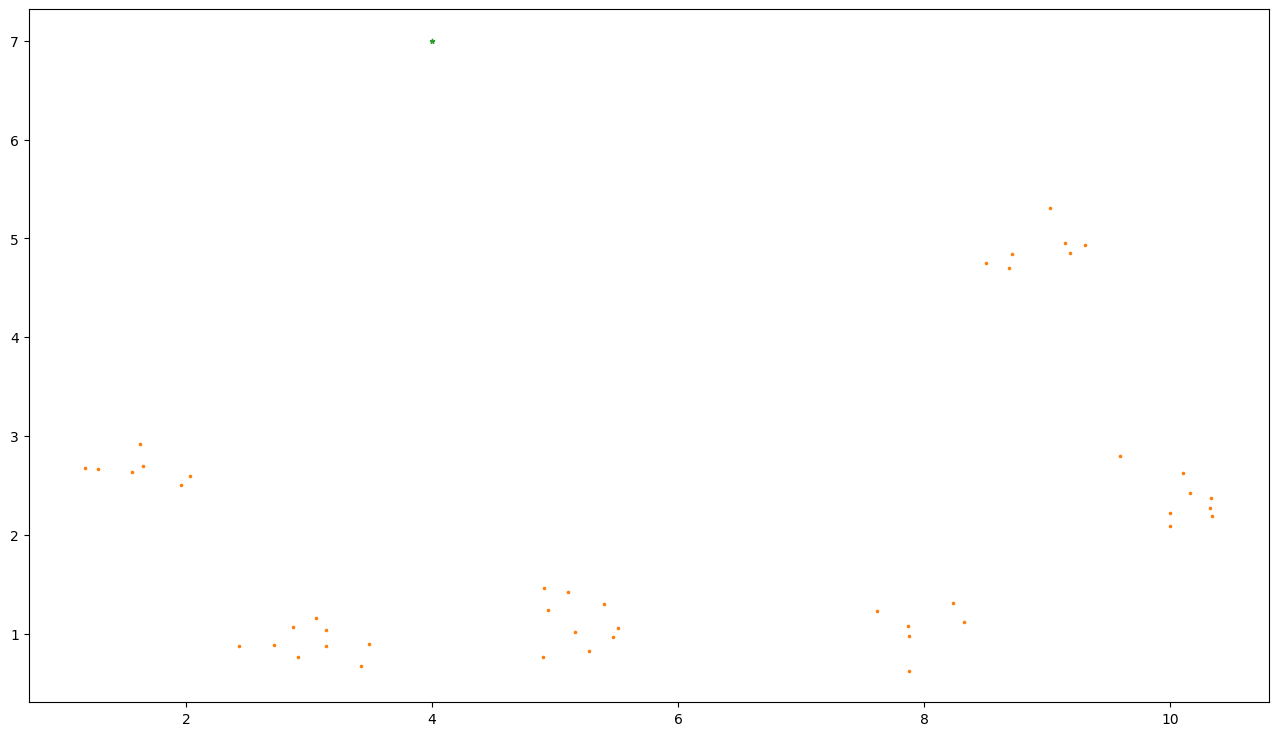

In [109]:
plotPolicy(smallcell1, 0, 'asdasd')

In [289]:
def plotResults(fp, title:str):
    A0 = fp[:,:,1,0];
    A1 = fp[:,:,0,1];

    Green_idx = np.where(A0 + A1 == 2)
    Red_idx = np.where(A0 + A1 == 0)
    Orange_idx = np.where( np.multiply((A0 == 1) , (A1 == 0) ))
    Yellow_idx = np.where( np.multiply((A0 == 0) , (A1 == 1) ))

    plt.title('Value Iteration')
    plt.xlabel('number of type 1 jobs')
    plt.ylabel('number of type 2 jobs')
    plt.plot( Red_idx[0], Red_idx[1], 'o', color='red',label='No calls accepted')
    plt.plot( Green_idx[0], Green_idx[1], 'o', color='green', label = 'Calls of both type accepted')
    plt.plot( Yellow_idx[0], Yellow_idx[1], 'o', color='blue', label = 'Only type 2 calls accepted')
    plt.plot( Orange_idx[0], Orange_idx[1], 'o', color='orange', label = 'Only type 1 calls accepted')

    plt.legend(bbox_to_anchor = (1, 0.7));
    plt.title(title);
    plt.show();

## Value and Modified Policy Iteration over array of dicount Factors (REFERENCE RESULTS FOR __Question 2.__)

Try out Q-iteration for one of the discount factors

Also loop over the betas and see effect of increasing beta..

In [987]:
smallcell1 = SmallCellNet(46, 5, "E:\\mustafa\\_Btech mech\\Salapaka Reseach Group\\Matlab\\ParaMDP\\para3.mat");
print(smallcell1.state())
smallcell1.setState(1)
print(smallcell1.cellLocations[3])
print(smallcell1.step(0))

(0,)
[0. 0.]
[[(0,), 14.999999999999986, 0.9, [-8.0, -14.0, 0, 0, 0, 0, 0, 0, 0, 0]], [(0,), 14.999999999999986, 0.1, [-8.0, -14.0, 0, 0, 0, 0, 0, 0, 0, 0]]]


In [458]:
verificationParams = [5.007172447314836, 4.739229358920149, 4.583635987485419, 5.560810885490961, 7.654917383332541, 3.317342581767660,
6.267291265380822, 4.612761646327473, 4.078552812091590, 4.005094924238611];
smallcell1.update_params(params=verificationParams);
smallcell1.parameters();
smallcell1.update_cost_matrix();
smallcell1.update_grad_matrix();

In [988]:
smallcell1.C[4, 0, 0]
smallcell1.G[4, 0 ,0]

array([  0.,   0.,   0.,   0.,   0.,   0.,  -8., -14.,   0.,   0.])

In [991]:
import time;

In [993]:
V_QI = np.zeros(shape = (*smallcell1.state_space_shape(), *smallcell1.act_space_shape()));
beta_array = [0.001011]; # [0.1, 1, 2, 4, 8, 10];
for bet in beta_array:
    st = time.time();
    [finalVal, finalPol, train_params] = QIteration(smallcell1, V_QI, state_space=state_space, action_space=act_space,gamma=0.9, beta=bet, n_iters=201, allow_print=True, reward2cost=1);
    print(f'Execution Time: {time.time() - st} seconds');
    pol_det = (finalPol > 0.5)*1; #make the NPG policy deterministic by determining action as 1 if the probability is greater than 1
    # plotResults(pol_det, title=f'Final Policy, $\\beta$ = {bet}');

iter: 0 	 Delta Value(infinity Norm): 1448.4059487801806
iter: 1 	 Delta Value(infinity Norm): 1046.3242779954185
iter: 2 	 Delta Value(infinity Norm): 824.178991431042
iter: 3 	 Delta Value(infinity Norm): 661.1592671744866
iter: 4 	 Delta Value(infinity Norm): 533.3155427836664
iter: 5 	 Delta Value(infinity Norm): 431.0739463769023
iter: 6 	 Delta Value(infinity Norm): 348.7430096532644
iter: 7 	 Delta Value(infinity Norm): 282.25961893104704
iter: 8 	 Delta Value(infinity Norm): 228.50435429629033
iter: 9 	 Delta Value(infinity Norm): 185.01210046522556
iter: 10 	 Delta Value(infinity Norm): 149.810788675426
iter: 11 	 Delta Value(infinity Norm): 121.31387377241481
iter: 12 	 Delta Value(infinity Norm): 98.24139191906215
iter: 13 	 Delta Value(infinity Norm): 79.5591769398352
iter: 14 	 Delta Value(infinity Norm): 64.43095242720483
iter: 15 	 Delta Value(infinity Norm): 52.18012345038187
iter: 16 	 Delta Value(infinity Norm): 42.259113201637774
iter: 17 	 Delta Value(infinity Norm)

c:\Users\Mustafa\Python\Python37\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


In [104]:
finalVal[3]!=0

array([ True,  True,  True, False,  True,  True])

In [994]:
finalPol[-1]

array([0. , 0.2, 0.2, 0.2, 0.2, 0.2])

## G Iteration to determine fixed point of gradient

Now, next apply GIteration on the mode, with the optimal policy obtained, to determine the fixed point of the gradient bellman equation for each parameter

In [999]:
#initializae the initial value for the GIteration
V_GI = np.zeros((n+f+1));
st = time.time();
[finalGVal, train_params] = GIteration(smallcell1, V_GI, finalPol, state_space, act_space, gamma=0.9, beta = 0.001011,
n_iters = 500, allow_print=True, reward2cost=1);
print(f'Execution Time: {time.time() - st} seconds');

iter: 42 	 Delta Value(infinity Norm): 3.99797762096199e-0553
Policy and Params:	for G, 9.073428078452004e-06 < 1e-5, Hence stopping GIteration
Execution Time: 0.05627894401550293 seconds


In [1000]:
smallcell1.G[4,0,0]

array([  0.,   0.,   0.,   0.,   0.,   0.,  -8., -14.,   0.,   0.])

In [1002]:
finalGVal[...,0]

array([ 0.        , -1.37530947, -0.7092879 , -0.7092879 , -0.7092879 ,
       -0.7092879 , -1.38805856, -1.27702757, -1.24291545, -1.14414262,
       -1.10618852, -1.26738084, -1.41359514, -1.65875498, -1.78202729,
       -1.93896431, -1.729637  , -1.91519881, -1.81217112, -1.81039211,
       -1.71516148, -1.55848891, -2.44635247, -2.66740466, -2.65300747,
       -2.4499523 , -2.62431106, -2.58031115, -2.46150901, -2.54136605,
       -2.5201711 , -3.67995164, -3.64660256, -3.5182915 , -3.51572357,
       -3.42425203, -3.51854809, -4.40336139, -4.39869323, -4.32133321,
       -4.13727214, -4.34145942, -4.28290329, -4.40624821, -4.28327811,
       -3.98952469, -4.032709  , -3.81024424, -3.97622515, -3.81932118,
       -3.93131298, -3.74469687])

In [1004]:
np.sum(finalGVal, axis=0)

array([-135.09890354,  -97.10851716, -135.09890354,  -97.10851716,
       -135.09890354,  -97.10851716, -135.09890354,  -97.10851716,
       -135.09890354,  -97.10851716])

## Parameter update via gradient decent

Now we apply the parameter optimization routine on the model to optimize the parameters for the fixed optimal policy at the given beta

In [1005]:
st = time.time()
train_params = optimizeParams(smallcell1, V_GI, finalPol, state_space, act_space, gamma=0.9, beta = 0.001011, epsilon=0.0001,
n_iters = 500, gd_iters= 200, allow_print=True, reward2cost=1);
print(f'Execution Time: {time.time() - st} seconds');

Execution Time: 10.689871072769165 seconds004327154755552121 	 Infinity Norm: 3.28600838739050933


In [1007]:
smallcell1.parameters()

array([2.11940418, 1.52341871, 2.11940418, 1.52341871, 2.11940418,
       1.52341871, 2.11940418, 1.52341871, 2.11940418, 1.52341871])

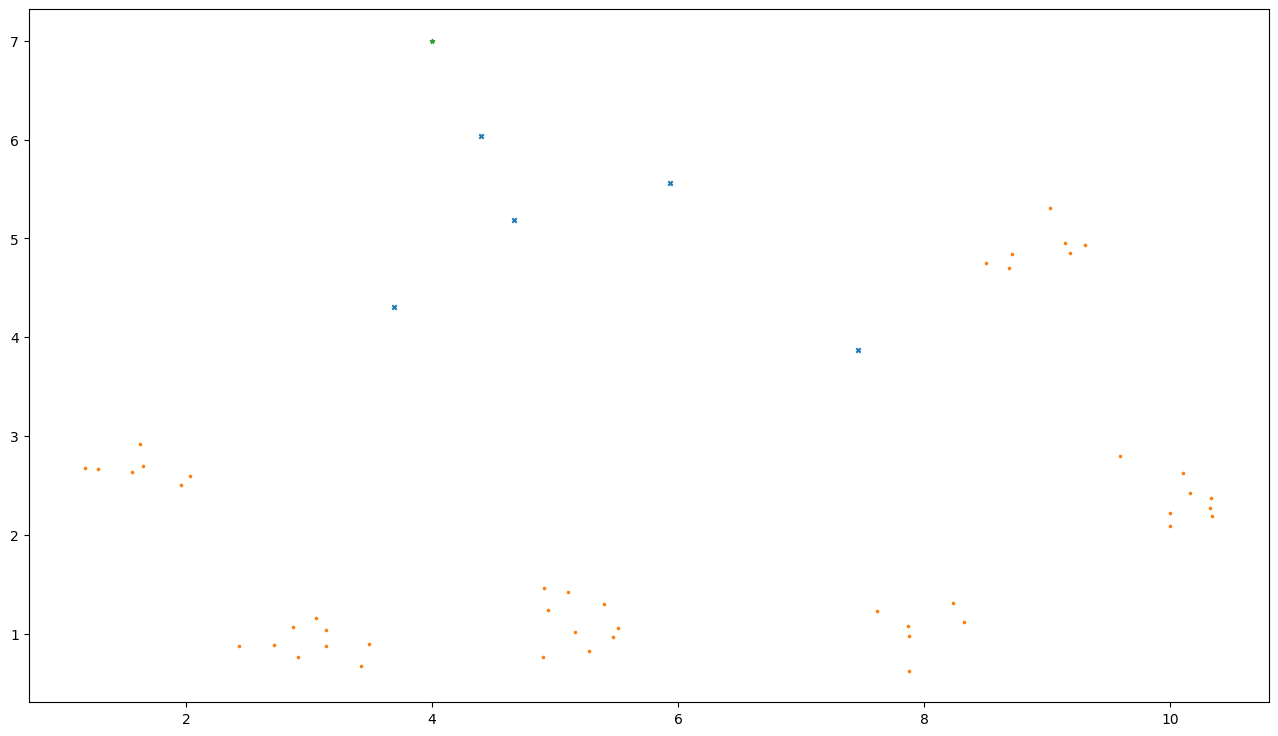

In [110]:
plotPolicy(smallcell1, [], 'testing')

## Combined Optimization of policy and parameters

Now we apply the parameter and policy optimization routine to obtain combined optimal result for policy and parameters for a given beta

In [1008]:
smallcell1.init_params();
smallcell1.init_cost_matrix();
smallcell1.init_grad_matrix();
smallcell1.init_action_mask();
smallcell1.parameters()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1010]:
smallcell1.G[4,0,0]

array([  0.,   0.,   0.,   0.,   0.,   0.,  -8., -14.,   0.,   0.])

In [112]:
verificationParams = [5.007172447314836, 4.739229358920149, 4.583635987485419, 5.560810885490961, 7.654917383332541, 3.317342581767660,
6.267291265380822, 4.612761646327473, 4.078552812091590, 4.005094924238611];
smallcell1.update_params(params=verificationParams);
smallcell1.parameters()

[5.007172447314836,
 4.739229358920149,
 4.583635987485419,
 5.560810885490961,
 7.654917383332541,
 3.31734258176766,
 6.267291265380822,
 4.612761646327473,
 4.07855281209159,
 4.005094924238611]

In [1011]:
[finalPol, train_params] = optimizePolicyNParams(smallcell1, gamma = 0.9, beta = 0.001011, epsilon=0.0001, n_iters=50,
n_iters_qi=201, gd_iters=200, n_iters_gi=500, allow_print=True, reward2cost=1);

c:\Users\Mustafa\Python\Python37\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


iter: 13 	 Delta Q Value(infinity Norm): 0.04444062425773154 	 Q-Infinity Norm: 6804.775436032938
Policy and Params:	for Q, 6.5307995356331155e-06 < 1e-10, Hence stopping Iteration


In [1012]:
smallcell1.parameters()

array([5.30193663, 3.81107132, 5.30193663, 3.81107132, 5.30193663,
       3.81107132, 5.30193663, 3.81107132, 5.30193663, 3.81107132])

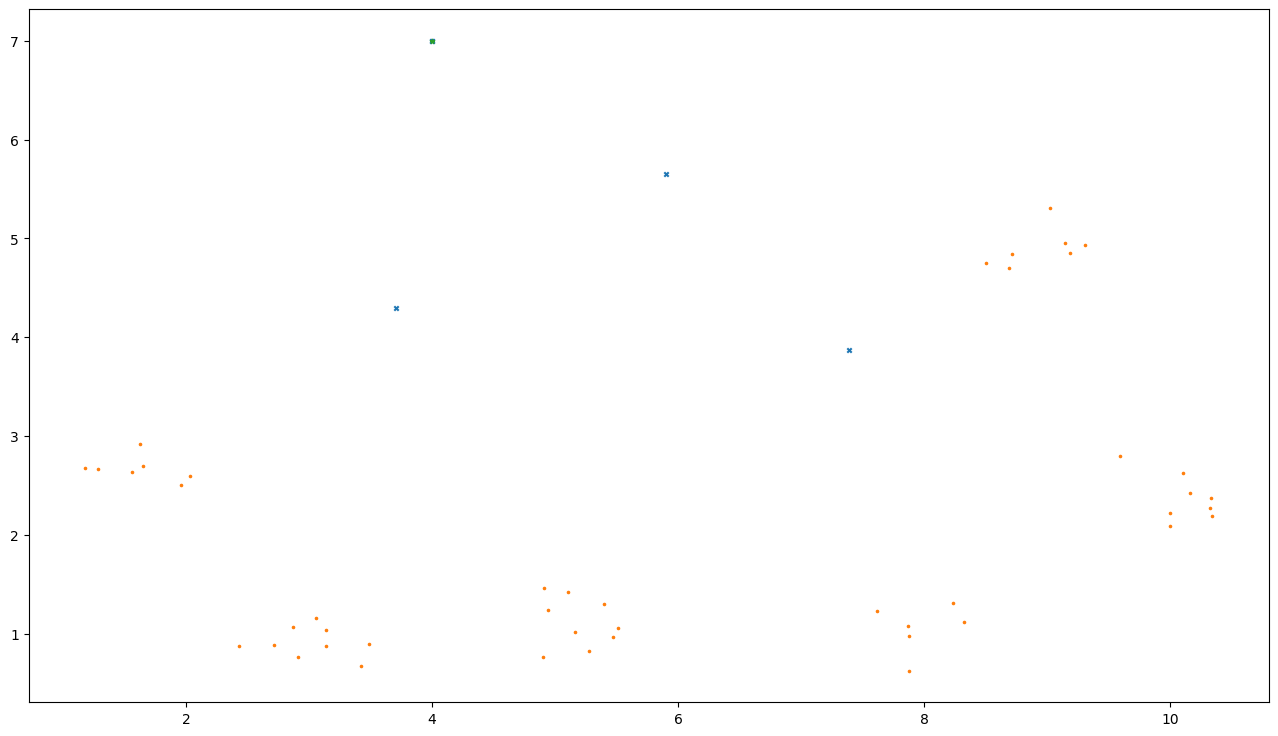

In [115]:
plotPolicy(smallcell1, [], 'testing')

## Annealed Combined optimization of Policy and Parameters

Finally we carry out combined optimizaition of policy and parameters while annealing the inverse temperature

In [1018]:
smallcell1.init_params();
smallcell1.init_cost_matrix();
smallcell1.init_grad_matrix();
smallcell1.init_action_mask();
smallcell1.parameters()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1020]:
smallcell1.G[4,0,0]

array([  0.,   0.,   0.,   0.,   0.,   0.,  -8., -14.,   0.,   0.])

0.001011

In [1037]:
finalPol = optimizePolicyNParams_annealed(smallcell1, gamma = 0.9, beta_init = 1.001, beta_max= 4, beta_grow=0.01, sigma=0.01,
epsilon=0.0001, n_iters=50, n_iters_qi=201, gd_iters=200, n_iters_gi=500, allow_print=True, reward2cost=1);

@beta = 1.001


c:\Users\Mustafa\Python\Python37\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


iter: 26 	 Delta Q Value(infinity Norm): 0.0004145570817826183 	 Q-Infinity Norm: 46.050571222198673
Policy and Params:	for Q, 9.002213670322098e-06 < 1e-10, Hence stopping Iteration
@beta = 1.011
iter: 14 	 Delta Q Value(infinity Norm): 0.0004393128573525473 	 Q-Infinity Norm: 46.05360478834769
Policy and Params:	for Q, 9.539163315695572e-06 < 1e-10, Hence stopping Iteration
@beta = 1.021
iter: 18 	 Delta Q Value(infinity Norm): 0.0004576687080302122 	 Q-Infinity Norm: 46.055616077356845
Policy and Params:	for Q, 9.937305089166404e-06 < 1e-10, Hence stopping Iteration
@beta = 1.031
iter: 21 	 Delta Q Value(infinity Norm): 0.00041301728717968444 	 Q-Infinity Norm: 46.05742261691597
Policy and Params:	for Q, 8.967442460143035e-06 < 1e-10, Hence stopping Iteration
@beta = 1.041
iter: 26 	 Delta Q Value(infinity Norm): 0.00041859820660050673 	 Q-Infinity Norm: 46.05877021826832
Policy and Params:	for Q, 9.088349615432802e-06 < 1e-10, Hence stopping Iteration
@beta = 1.051
iter: 16 	 Delta

In [1022]:
smallcell1.parameters()

array([3.83981127, 3.16890204, 3.61204646, 4.88285076, 7.51445504,
       3.8382525 , 6.01356308, 5.54154186, 3.69836715, 5.00587106])

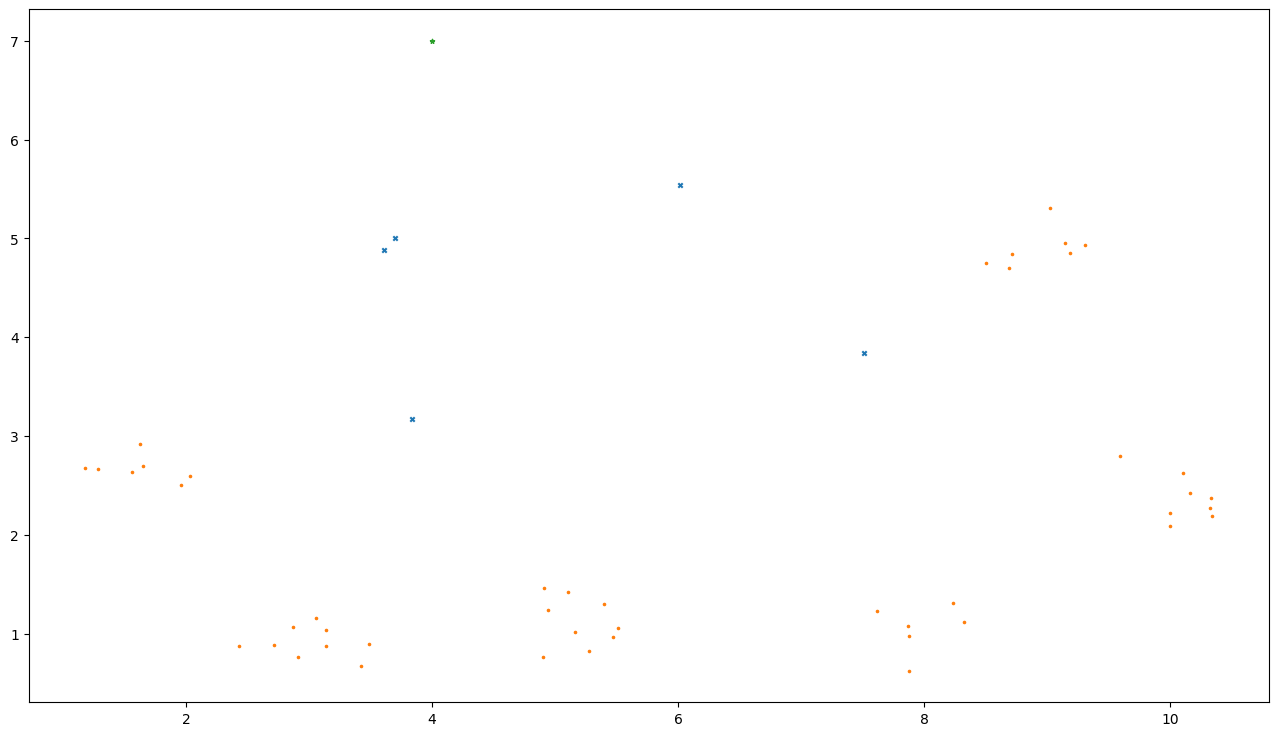

In [1023]:
plotPolicy(smallcell1, finalPol, 'at beta = 0.6');

In [1025]:
smallcell1.parameters()

array([3.90232798, 3.07791194, 3.35366612, 4.87663154, 7.5179715 ,
       3.75605548, 6.03803808, 5.55608109, 3.85202131, 5.01752177])

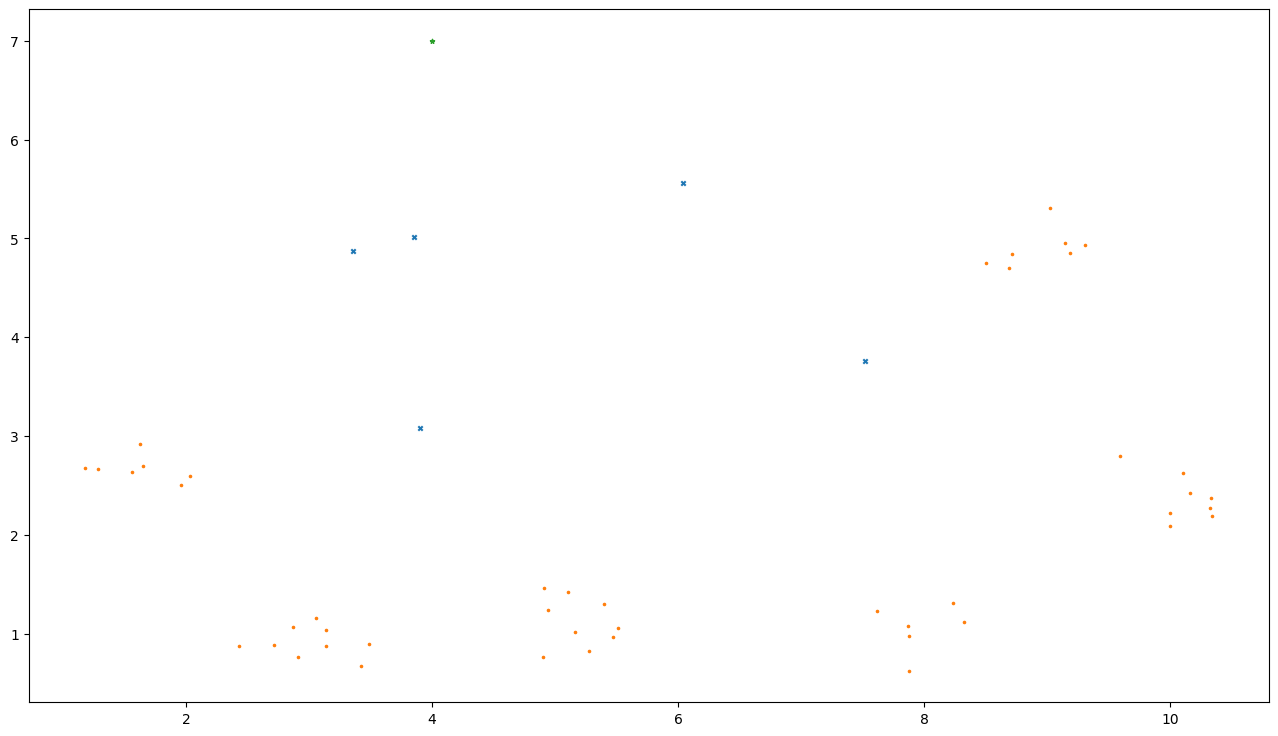

In [1026]:
plotPolicy(smallcell1, finalPol, 'at beta = 1');

In [1036]:
finalPol[1:6]

array([[2.23916073e-02, 0.00000000e+00, 3.39718694e-01, 4.67469835e-10,
        7.53233406e-05, 6.37814374e-01],
       [9.73573397e-01, 8.14464081e-07, 0.00000000e+00, 3.62671143e-15,
        1.85815439e-06, 2.64239309e-02],
       [7.43872347e-04, 1.98887762e-06, 6.43598435e-06, 0.00000000e+00,
        9.98731214e-01, 5.16488642e-04],
       [9.99030587e-01, 3.17726133e-09, 3.26928415e-05, 9.90187681e-09,
        0.00000000e+00, 9.36707070e-04],
       [9.94911324e-01, 2.93869792e-07, 5.07815061e-03, 5.59328501e-14,
        1.02315417e-05, 0.00000000e+00]])

In [1038]:
smallcell1.parameters()

array([4.05899557, 3.06582321, 2.84388003, 4.89256311, 7.54431724,
       3.73343435, 6.06372294, 5.56111474, 4.03657733, 4.99223427])

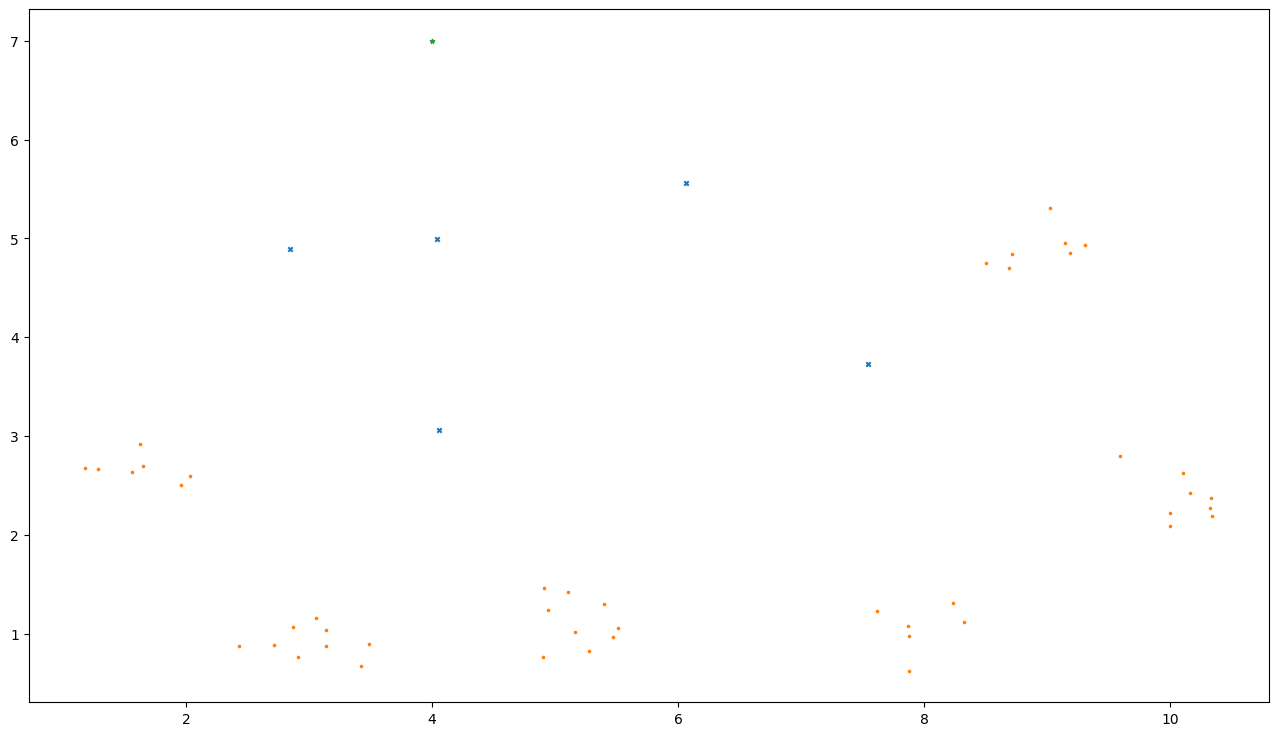

In [1039]:
plotPolicy(smallcell1, finalPol, 'at beta = 4');

In [1040]:
finalPol[1:6]

array([[2.84039621e-06, 0.00000000e+00, 2.04348336e-05, 5.00851789e-36,
        1.43811872e-15, 9.99976725e-01],
       [9.99999940e-01, 2.99114847e-27, 0.00000000e+00, 2.96341745e-66,
        5.09351027e-28, 6.01149378e-08],
       [4.91323102e-13, 1.40906978e-22, 5.69572801e-31, 0.00000000e+00,
        1.00000000e+00, 1.21543937e-11],
       [1.00000000e+00, 2.35696893e-35, 5.70307970e-26, 5.82553541e-34,
        0.00000000e+00, 4.65796020e-12],
       [1.00000000e+00, 1.83261082e-28, 7.52654901e-14, 7.91754214e-53,
        5.20855208e-20, 0.00000000e+00]])

In [136]:
st = time.time();
[finalVal, finalPol, train_params] = QIteration(smallcell1, V_QI, state_space=state_space, action_space=act_space,gamma=0.9, beta=0.09808442335650612, n_iters=201, allow_print=True, reward2cost=1);
print(f'Execution Time: {time.time() - st} seconds');

iter: 0 	 Delta Value(infinity Norm): 61.57916467414668
iter: 1 	 Delta Value(infinity Norm): 40.89118832037966
iter: 2 	 Delta Value(infinity Norm): 11.8336507779105
iter: 3 	 Delta Value(infinity Norm): 8.357632205107215
iter: 4 	 Delta Value(infinity Norm): 6.73112334214138
iter: 5 	 Delta Value(infinity Norm): 5.711713087348393
iter: 6 	 Delta Value(infinity Norm): 4.971745438568007
iter: 7 	 Delta Value(infinity Norm): 4.385712452715211
iter: 8 	 Delta Value(infinity Norm): 3.8976267772803226
iter: 9 	 Delta Value(infinity Norm): 3.478885899826736
iter: 10 	 Delta Value(infinity Norm): 3.113301566236032
iter: 11 	 Delta Value(infinity Norm): 2.79074513294961
iter: 12 	 Delta Value(infinity Norm): 2.504300139272914
iter: 13 	 Delta Value(infinity Norm): 2.2488787119271763
iter: 14 	 Delta Value(infinity Norm): 2.02051446802335
iter: 15 	 Delta Value(infinity Norm): 1.8159796719778285
iter: 16 	 Delta Value(infinity Norm): 1.6325666253543432
iter: 17 	 Delta Value(infinity Norm): 1.

In [135]:
finalPol[0]

array([1., 0., 0., 0., 0., 0.])

In [899]:
smallcell1.parameters()

[6.007757208708918,
 2.104083435284257,
 6.008014201325682,
 2.104124361157113,
 6.0077779263974715,
 2.1040646993695007,
 6.007923671264877,
 2.104094832452829,
 6.007759888489781,
 2.1040738389539695]

gamma: 0.9


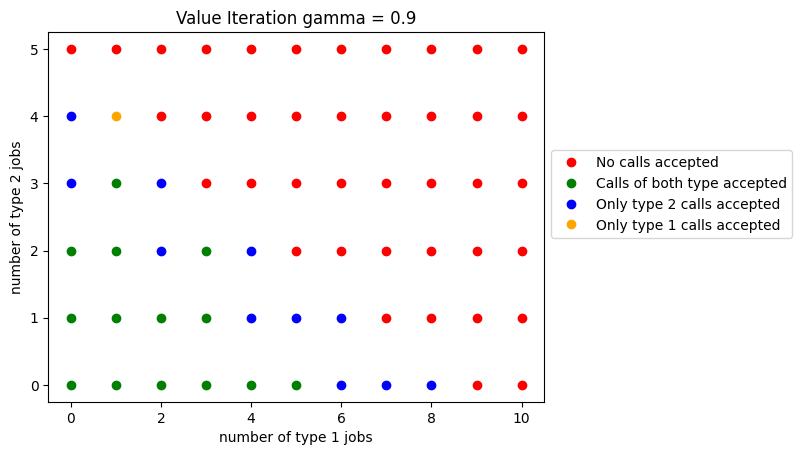

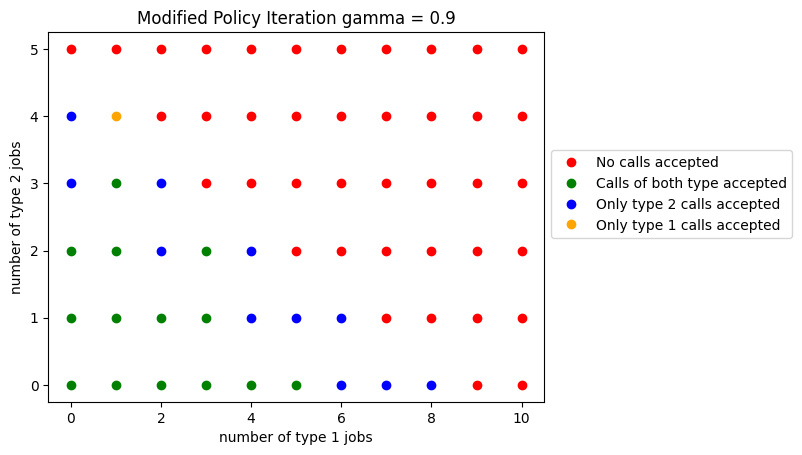

gamma: 0.6


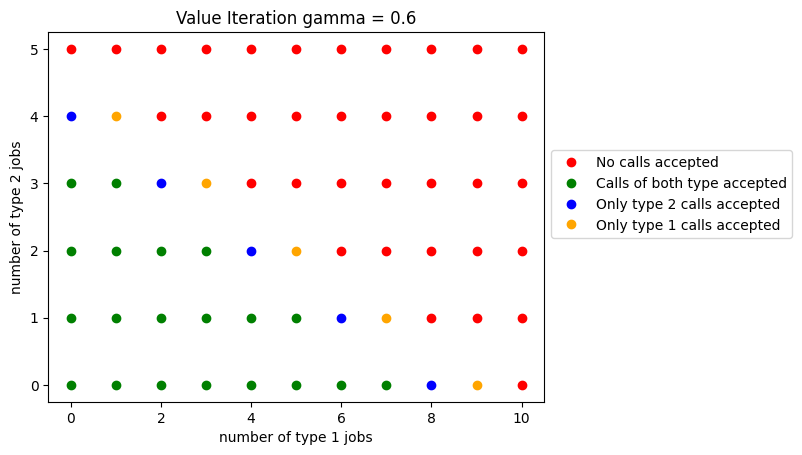

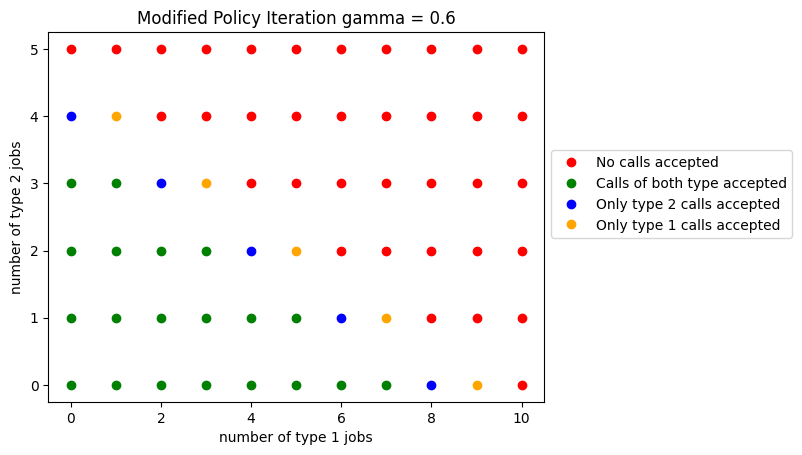

gamma: 0.45


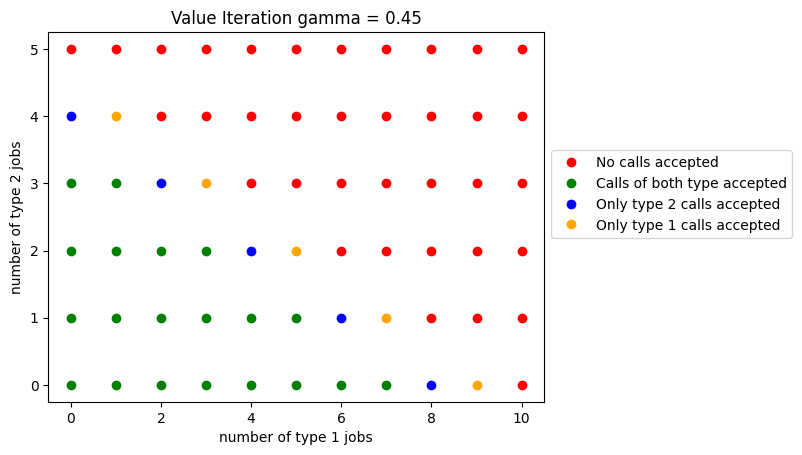

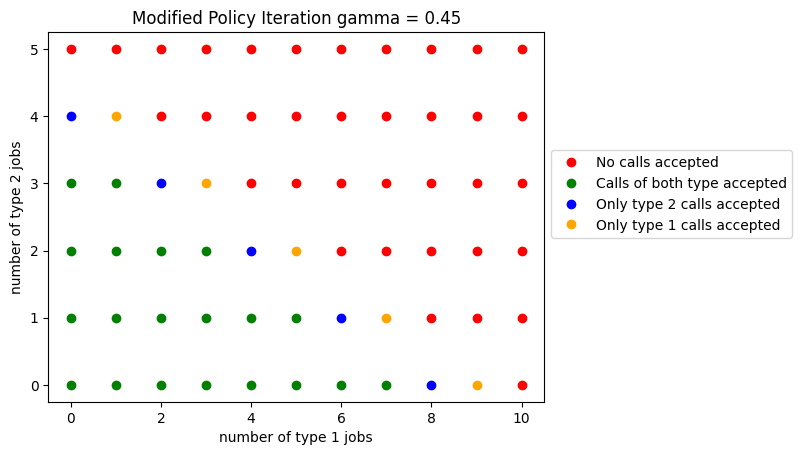

gamma: 0.3


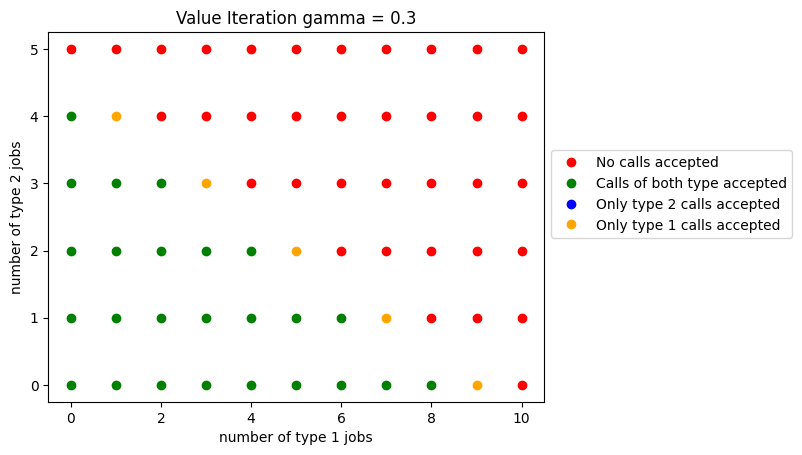

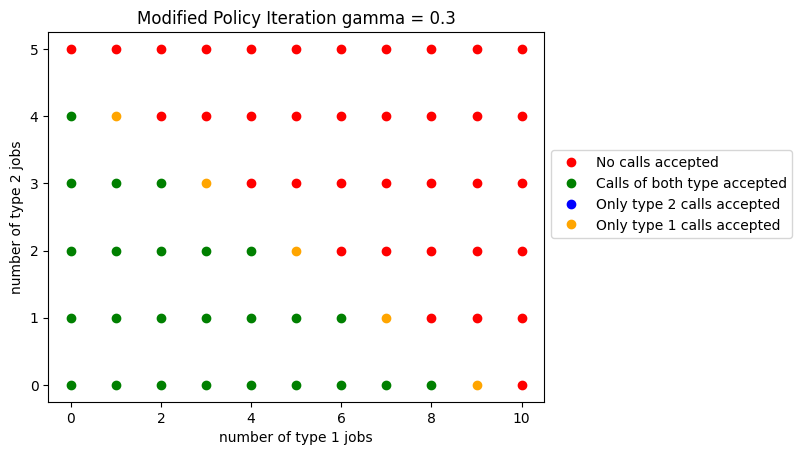

In [159]:
gamma_array = [0.9, 0.6, 0.45, 0.3]; #[0.9, 0.6, 0.3]
for gam in gamma_array:
    print(f'gamma: {gam}')
    [finalVal, finalPol, train_params] = valueIteration(gpu1r, V_VI, state_space=state_space, action_space=act_space,gamma=gam, n_iters=50, allow_print=False);
    plotResults(finalPol, f'Value Iteration gamma = {gam}');
    [finalVal, finalPol, train_params] = ModifiedPolicyIteration(gpu1r, V_VI, state_space=state_space, action_space=act_space,gamma=gam, n_iters=50, m=10, allow_print=False); 
    plotResults(finalPol, f'Modified Policy Iteration gamma = {gam}');

## T-D Learning

Carry out TD learning using a particular policy defined using the probability of accepting jobs of type 1 or 2

In [11]:
def TD_learn_Q(model, init_state, accept_prob, gamma = 0.95, max_iters=10000000, eps=lambda x: 0.05, max_episdoes = 1):
    '''
    return:
    Q_estim: The optimized estimate of the Q-function
    out_params: Disctionary of parameters for analysis of training process
    '''

    
    
    #start with the initialization of the Q-function to all zeros
    Q_estim = np.zeros((model.max_job1+1,model.max_job2+1,3,3, 2));
    visits = np.zeros((model.max_job1+1,model.max_job2+1,3,3, 2));
    out_params = {};
    Q_norm_array = [];
    
    #carry out some number of steps along the policy..
    for it in range(max_episdoes): #loop for number of episodes(1 implies single state-space trajectory)
        #start with the initial state and set the model state to that state
        model.setState(*init_state);
        # print(f'initialization No: {it}, State: {s}');
        #start with setting up the initial action..
        acts = model.get_actions(); #print(acts);
        # acts= [0,1];
        if (len(acts) == 2):
            policy = [1 - accept_prob[model.state()], accept_prob[model.state()]];
        else:
            policy = [1];
        print(policy);
        act = np.random.choice(acts, p=policy); #choose one from the actions with equal probability..
        for i in range(max_iters):
            epps = eps(i+1)
            #first...randomly select a policy according to the action..
            #get the actions..
            # eps = 1/((10000*it) + i +1);
            Q_prev = Q_estim.copy();
            #now carry out the action on thte system and get the reward and, befire that, save the reference of the present state of the model
            state = model.state();
            act_prev = act;
            acts_prev = acts;
            #now execute the action and jumpt to the next state getting the reward,
            reward = model.step_and_exec(act);
            #next sample the action for the next state....
            acts = model.get_actions();
            # acts=[0,1];
            if (len(acts) == 2):
                policy = [1 - accept_prob[model.state()], accept_prob[model.state()]];
            else:
                policy = [1];
            act = np.random.choice(acts, p=policy); #choose one from the actions with equal probability..
            # print(Q_estim[(*gpuq.state(), 1)]);
            #with the instantaneous reward and the present state of the Q function.....updte the Q function eatimate..
            Q_estim[(*state, act_prev)] -= epps * (Q_estim[(*state, act_prev)] - reward - gamma*Q_estim[(*model.state(), act)]);
            visits[(*model.state(), act)] +=1;
            Q_norm_array.append(np.max(np.abs(Q_estim)));
            if(i%2000 == 0):
                print(f"episode = {it}, i={i}: ({state}, {act_prev}, {reward} -> {model.state()}), Q: {Q_estim[(*model.state(), act_prev)]}, Q_norm: {Q_norm_array[-1]}", end='\r'); #Q_prev

            # print(state_next);
            #now set the state to the next state..
            # model.setState(*state_next);
            # print(gpuq.state());
    
    out_params = {'visits': visits, 'Q_norm_array': Q_norm_array};
    #finally return the optimal Q function value..
    return [Q_estim, out_params];

define the Model

In [64]:
s_ind = np.random.choice(range(len(state_space)));
s = state_space[s_ind];
print(s);

#Now define a gpu model environment to run the policy on..
gpu_td_a = GPU_Model(BW, reward1, reward2, lambda1, lambda2, mu1);
print(f'Max_Jobs_1: {gpu_td_a.max_job1}');
print(f'Max_Jobs_2: {gpu_td_a.max_job2}');
print(f'Reward 1: {gpu_td_a.reward1}');
print(f'Reward 2:{gpu_td_a.reward2}');
print(f'mu 1: {gpu_td_a.mu1}');
print(f'lambda 1: {gpu_td_a.lambda1}');
print(f'lambda 2: {gpu_td_a.lambda2}');
print(gpu_td_a.get_actions());
gpu_td_a.setState(0,0,0,1);
# gpuq.setState(8,1,0,0);
s = gpu_td_a.state();
print(s);
print(gpu_td_a.get_actions());
print(gpu_td_a.step_and_exec(1));
print(s);
print(gpu_td_a.state());

(5, 1, 0, 2)
Max_Jobs_1: 10
Max_Jobs_2: 5
Reward 1: 1
Reward 2:10
mu 1: 0.04
lambda 1: 0.2
lambda 2: 0.2
[0]
(0, 0, 0, 1)
[0, 1]
10
(0, 0, 0, 1)
(0, 1, 0, 2)


### Carry out TD-Learning for Q and Advantage functions (__Question 1__)
accept_prob := Probability of accepting a job of type i

run No: 0, Initial State: (7, 2, 2, 0)
[1]


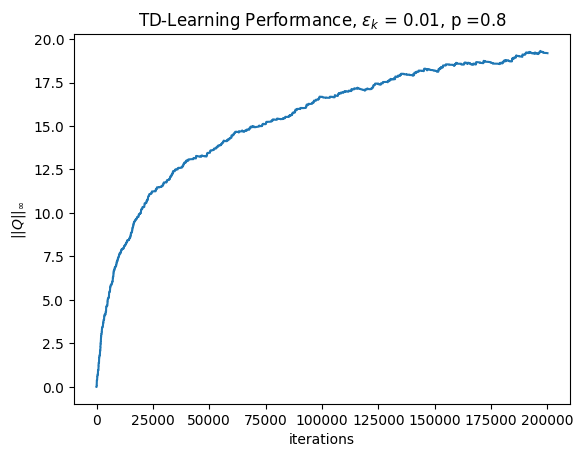

run No: 1, Initial State: (6, 5, 0, 0)
[1]


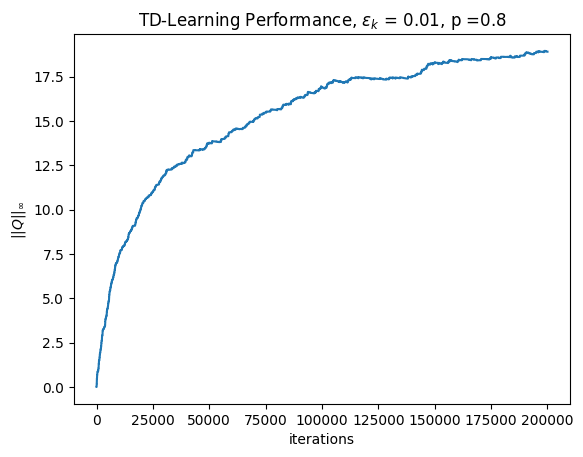

run No: 2, Initial State: (9, 3, 2, 0)
[1]


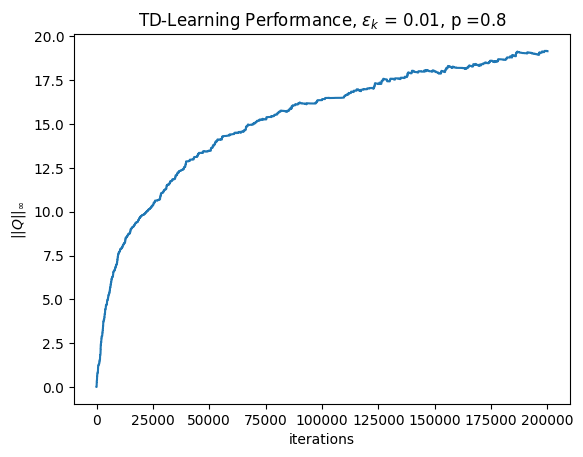

run No: 3, Initial State: (5, 1, 0, 2)
[1]


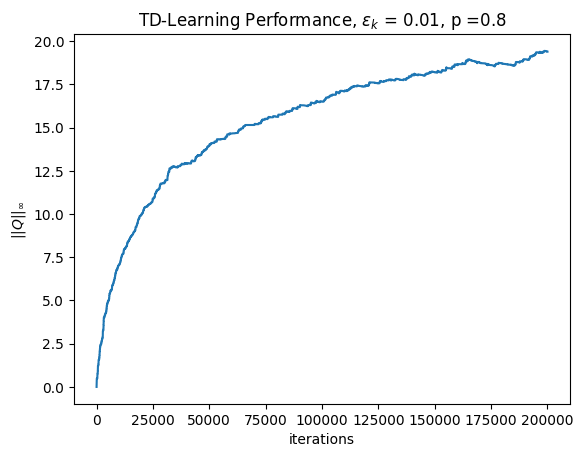

run No: 4, Initial State: (4, 5, 1, 0)
[1]


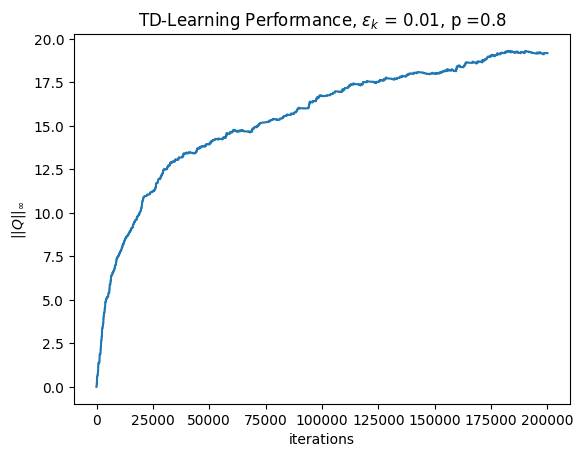

run No: 5, Initial State: (9, 4, 0, 1)
[1]


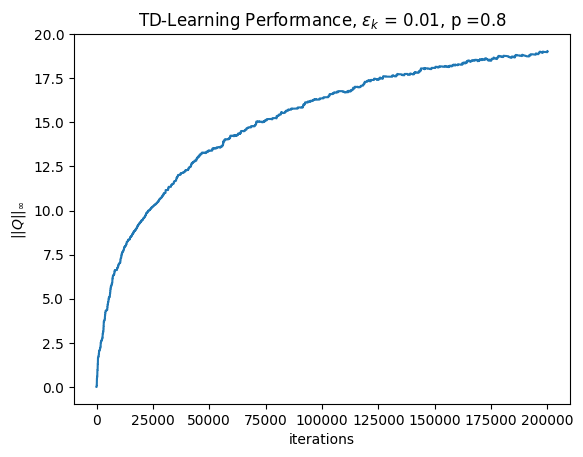

run No: 6, Initial State: (6, 0, 0, 2)
[1]


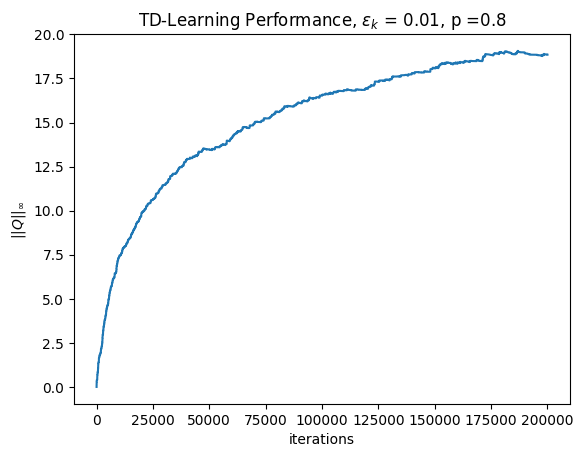

run No: 7, Initial State: (6, 0, 0, 0)
[1]


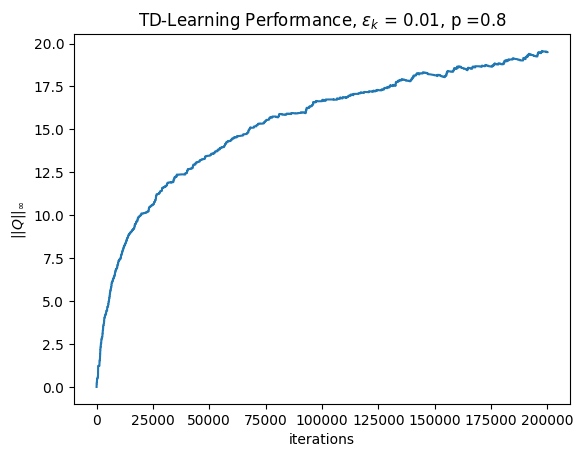

run No: 8, Initial State: (7, 0, 0, 1)
[0.19999999999999996, 0.8]


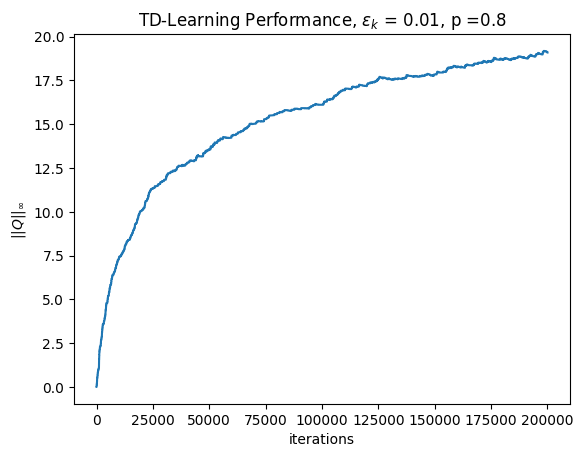

run No: 9, Initial State: (5, 3, 1, 0)
[1]


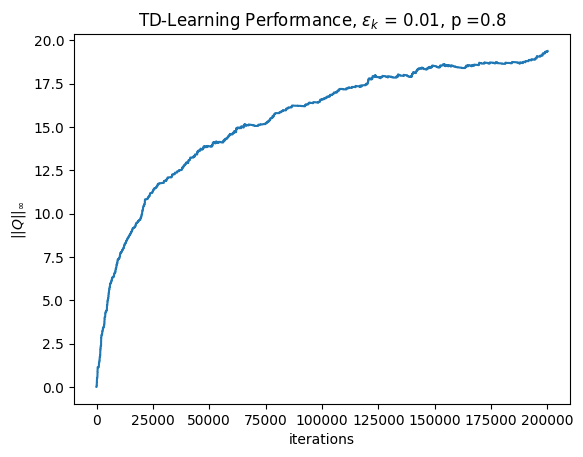

In [65]:
#Try carrying out TD-learning using the above defined model....
ep = 0.01;
accept_prob = 0.8; #probability of acceptance of a job of type i
accept_policy = np.ones((gpu_td_a.max_job1+1,gpu_td_a.max_job2+1,3,3))*accept_prob; #policy for TD learning. indicates probability of acceptance
A_estim_arr2 = [];
Q_estim_arr2=[];
for attempt in range(10):
    s_ind = np.random.choice(range(len(state_space)));
    s = state_space[s_ind];
    print(f'run No: {attempt}, Initial State: {s}');
    
    [Q_estim2, logParams] = TD_learn_Q(gpu_td_a, init_state=s, accept_prob=accept_policy, gamma=0.9, eps=lambda x: ep, max_iters=200000);
    V_estim2 = accept_policy*Q_estim2[:,:,:,:,1] + (1-accept_policy)*Q_estim2[:,:,:,:,0]; V_estim2 = V_estim2.reshape(*V_estim2.shape, 1);
    A_estim2 = Q_estim2 - V_estim2;
    plt.plot(logParams['Q_norm_array']); plt.title(f'TD-Learning Performance, $\epsilon_k$ = {ep}, p ={accept_prob}');
    plt.xlabel('iterations'); plt.ylabel(r'$||Q||_{\infty}$');
    plt.show();
    A_estim_arr2.append(A_estim2);
    Q_estim_arr2.append(Q_estim2);

#convert the resulting arry into a nd-array
A_estim_arr2 = np.array(A_estim_arr2);
Q_estim_arr2 = np.array(Q_estim_arr2);

Next, calculate the standard deviations of the Q-estimate and the Advantage Estimate

In [66]:
print(A_estim_arr2.shape)
print(Q_estim_arr2.shape)
A_estim2_std = np.std(A_estim_arr2, axis=0);
print(A_estim2_std.shape)
Q_estim2_std = np.std(Q_estim_arr2, axis=0);
print(Q_estim2_std.shape)

(10, 11, 6, 3, 3, 2)
(10, 11, 6, 3, 3, 2)
(11, 6, 3, 3, 2)
(11, 6, 3, 3, 2)


Also compute the standard deviation of the advantage function manually using first principle operations

In [67]:
A_estim_arr2_mean = np.mean(A_estim_arr2, axis=0, keepdims=True);
A_estim_arr2_sqdev = (A_estim_arr2 - A_estim_arr2_mean)**2;
print(A_estim_arr2_sqdev.shape)
A_estim_arr2_stddev = np.mean(A_estim_arr2_sqdev, axis=0) ** 0.5;
print(A_estim_arr2_stddev.shape);

(10, 11, 6, 3, 3, 2)
(11, 6, 3, 3, 2)


### Plot the Q and Advantage function Standard deviations measures

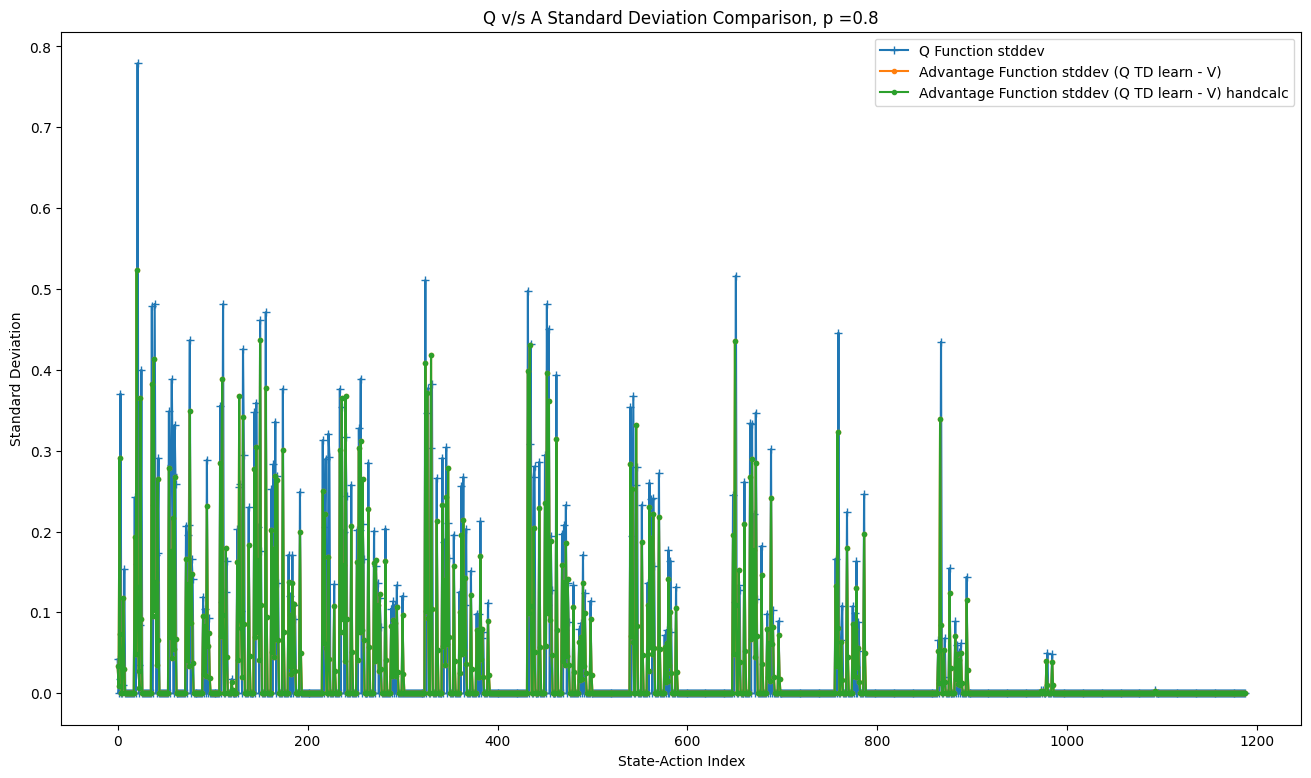

In [68]:
plt.figure(figsize=(16,9))
plt.plot(Q_estim2_std.reshape(-1,1), label="Q Function stddev", marker="+")
plt.plot(A_estim2_std.reshape(-1,1), label="Advantage Function stddev (Q TD learn - V)", marker=".");
plt.plot(A_estim_arr2_stddev.reshape(-1,1), label="Advantage Function stddev (Q TD learn - V) handcalc", marker=".");
plt.title(f'Q v/s A Standard Deviation Comparison, p ={accept_prob}');
plt.xlabel('State-Action Index'); plt.ylabel('Standard Deviation');
plt.legend();

## Natural Policy Gradient (__Question 2__)

Now we implement the natural policy gradient algorithm

In [22]:
def NPG(model, init_accept_policy, beta=0.1, gamma= 0.9, eps = lambda x: 0.01, max_td_iters = 2000000, max_iters = 7):

    #start with the initial policy and initialize the advantage function estimate
    #just simply start the iterations of td learning for advantage function and policy update..
    accept_policy = init_accept_policy; #probability of acceptance at any state

    #start the loop
    for i in range(max_iters):
        accept_policy_prev = accept_policy;
        #carry out TD learning using the present policy

        #for eaach iteration randomly initialize the initial state..
        s_ind = np.random.choice(range(len(state_space)));
        init_state = state_space[s_ind];
        print(f'iter= {i}, initial_state= {init_state}');
        
        [Q_pi, logParams] = TD_learn_Q(gpu_td_a, init_state=init_state, accept_prob=accept_policy, gamma=gamma, eps=eps, max_iters=max_td_iters);
        V_pi = accept_policy*Q_pi[:,:,:,:,1] + (1-accept_policy)*Q_pi[:,:,:,:,0]; V_pi = V_pi.reshape(*V_pi.shape, 1);
        A_pi = Q_pi - V_pi;

        #now update the policy using advantage function
        prosp_accept_pol = accept_policy * np.exp( (beta/(1-gamma))*A_pi[:,:,:,:,1]);
        prosp_reject_pol = (1-accept_policy) * np.exp( (beta/(1-gamma))*A_pi[:,:,:,:,0]);

        print(prosp_accept_pol.shape); print(prosp_reject_pol.shape);
        #finally update the policy, in this case just the probability of acceptance.
        accept_policy = prosp_accept_pol / (prosp_accept_pol + prosp_reject_pol);
    
    #finally return the opdimat policy as the output
    return (accept_policy);


Define the model for Natural Policy Gradient

In [46]:
s_ind = np.random.choice(range(len(state_space)));
s = state_space[s_ind];
print(s);

#Now define a gpu model environment to run the policy on..
gpu_npg = GPU_Model(BW, reward1, reward2, lambda1, lambda2, mu1);
print(f'Max_Jobs_1: {gpu_npg.max_job1}');
print(f'Max_Jobs_2: {gpu_npg.max_job2}');
print(f'Reward 1: {gpu_npg.reward1}');
print(f'Reward 2:{gpu_npg.reward2}');
print(f'mu 1: {gpu_npg.mu1}');
print(f'lambda 1: {gpu_npg.lambda1}');
print(f'lambda 2: {gpu_npg.lambda2}');
print(gpu_npg.get_actions());
gpu_npg.setState(0,0,0,1);
# gpuq.setState(8,1,0,0);
s = gpu_npg.state();
print(s);
print(gpu_npg.get_actions());
print(gpu_npg.step_and_exec(1));
print(s);
print(gpu_npg.state());

(10, 2, 0, 2)
Max_Jobs_1: 10
Max_Jobs_2: 5
Reward 1: 1
Reward 2:10
mu 1: 0.04
lambda 1: 0.2
lambda 2: 0.2
[0]
(0, 0, 0, 1)
[0, 1]
10
(0, 0, 0, 1)
(0, 1, 0, 1)


Now initialize and run the natural policy gradient

In [49]:
accept_prob = 0.5;
accept_policy = np.ones((gpu_npg.max_job1+1,gpu_npg.max_job2+1,3,3))*accept_prob;
gamma = 0.45;

pol_npg = NPG(gpu_npg, init_accept_policy=accept_policy, beta=0.1,gamma=gamma,eps=lambda x: 0.01, max_td_iters=2000000, max_iters=7);

iter= 0, initial_state= (6, 4, 2, 0)
[1]
(11, 6, 3, 3)i=1998000: ((0, 4, 0, 0), 0, 0 -> (0, 4, 0, 1)), Q: 0.7962015651619959, Q_norm: 11.2235847201383966
(11, 6, 3, 3)
iter= 1, initial_state= (0, 5, 0, 2)
[1]
(11, 6, 3, 3)i=1998000: ((5, 2, 0, 1), 0, 0 -> (5, 2, 0, 2)), Q: 1.2819860442804136, Q_norm: 11.6678999918439977
(11, 6, 3, 3)
iter= 2, initial_state= (3, 3, 1, 0)
[0.4192400256638814, 0.5807599743361186]
(11, 6, 3, 3)i=1998000: ((2, 3, 0, 0), 0, 0 -> (2, 3, 2, 0)), Q: 1.6338904577479882, Q_norm: 11.77902397383189624
(11, 6, 3, 3)
iter= 3, initial_state= (9, 5, 1, 0)
[1]
(11, 6, 3, 3)i=1998000: ((2, 4, 0, 2), 0, 0 -> (2, 3, 0, 2)), Q: 1.792011053223285, Q_norm: 11.920220502331542828
(11, 6, 3, 3)
iter= 4, initial_state= (9, 0, 0, 2)
[1]
(11, 6, 3, 3)i=1998000: ((2, 4, 0, 1), 0, 0 -> (2, 4, 0, 0)), Q: 0.20263777018187534, Q_norm: 11.8803677371578476
(11, 6, 3, 3)
iter= 5, initial_state= (6, 2, 0, 2)
[1]
(11, 6, 3, 3)i=1998000: ((1, 4, 0, 1), 0, 0 -> (1, 4, 1, 0)), Q: 0.289914049828

Plot the NPG policy

0.6871043552863976


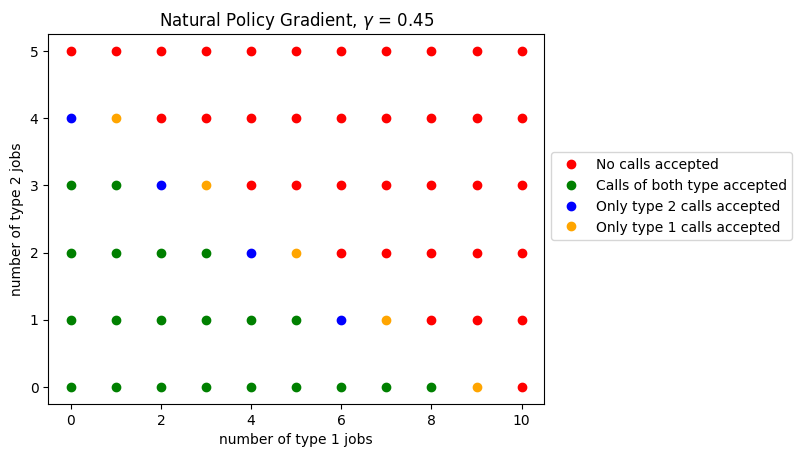

In [50]:
pol_npg_det = (pol_npg > 0.5)*1; #make the NPG policy deterministic by determining action as 1 if the probability is greater than 1
print(pol_npg[6, 0, 1, 0])
plotResults(pol_npg_det, title=f'Natural Policy Gradient, $\gamma$ = {gamma}');

### NPG over Array of discount factors

NPG for gamma = 0.6
iter= 0, initial_state= (8, 1, 0, 2)
[1]
(11, 6, 3, 3)i=1998000: ((2, 3, 0, 0), 0, 0 -> (2, 3, 0, 0)), Q: 1.5811309987435878, Q_norm: 11.8666996848860448
(11, 6, 3, 3)
iter= 1, initial_state= (4, 0, 2, 0)
[1]
(11, 6, 3, 3)i=1998000: ((2, 3, 2, 0), 0, 0 -> (1, 3, 0, 0)), Q: 2.497670214317754, Q_norm: 12.91552076191618468
(11, 6, 3, 3)
iter= 2, initial_state= (1, 4, 2, 0)
[1]
(11, 6, 3, 3)i=1998000: ((1, 4, 0, 0), 0, 0 -> (1, 4, 0, 0)), Q: 0.6176042109910524, Q_norm: 13.3424165168252081
(11, 6, 3, 3)
iter= 3, initial_state= (6, 1, 0, 2)
[1]
(11, 6, 3, 3)i=1998000: ((5, 2, 0, 0), 0, 0 -> (5, 2, 0, 1)), Q: 0.7869755127876046, Q_norm: 13.37461089300093886
(11, 6, 3, 3)
iter= 4, initial_state= (4, 5, 0, 1)
[1]
(11, 6, 3, 3)i=1998000: ((2, 3, 0, 1), 1, 10 -> (2, 4, 0, 1)), Q: 0.0, Q_norm: 13.2570431998895532178506792724245
(11, 6, 3, 3)
iter= 5, initial_state= (9, 3, 1, 0)
[1]
(11, 6, 3, 3)i=1998000: ((4, 3, 0, 0), 0, 0 -> (4, 3, 0, 1)), Q: 0.4308401860955047, Q_norm: 13.4

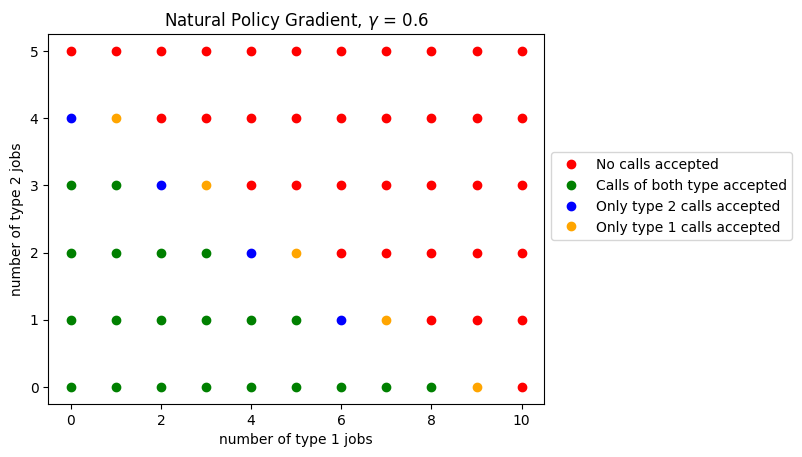

NPG for gamma = 0.3
iter= 0, initial_state= (1, 0, 2, 0)
[1]
(11, 6, 3, 3)i=1998000: ((3, 3, 0, 1), 0, 0 -> (3, 3, 0, 1)), Q: 0.0649275907136059, Q_norm: 10.58808713902374944
(11, 6, 3, 3)
iter= 1, initial_state= (2, 4, 1, 0)
[1]
(11, 6, 3, 3)i=1998000: ((1, 3, 1, 0), 0, 0 -> (1, 3, 0, 0)), Q: 0.7184144538685928, Q_norm: 10.88623604153280258
(11, 6, 3, 3)
iter= 2, initial_state= (1, 0, 0, 1)
[0.0554309347651758, 0.9445690652348242]
(11, 6, 3, 3)i=1998000: ((4, 2, 1, 0), 1, 1 -> (5, 2, 0, 0)), Q: 0.0, Q_norm: 10.95256625703588997090219283044449
(11, 6, 3, 3)
iter= 3, initial_state= (7, 5, 2, 0)
[1]
(11, 6, 3, 3)i=1998000: ((1, 3, 0, 0), 0, 0 -> (1, 3, 0, 0)), Q: 0.7680036121900384, Q_norm: 11.000751374960211471
(11, 6, 3, 3)
iter= 4, initial_state= (1, 5, 0, 0)
[1]
(11, 6, 3, 3)i=1998000: ((4, 3, 0, 0), 0, 0 -> (4, 3, 1, 0)), Q: 0.04227743446034805, Q_norm: 10.9854318342317931
(11, 6, 3, 3)
iter= 5, initial_state= (3, 1, 1, 0)
[0.32742585065382424, 0.6725741493461758]
(11, 6, 3, 3)i=199

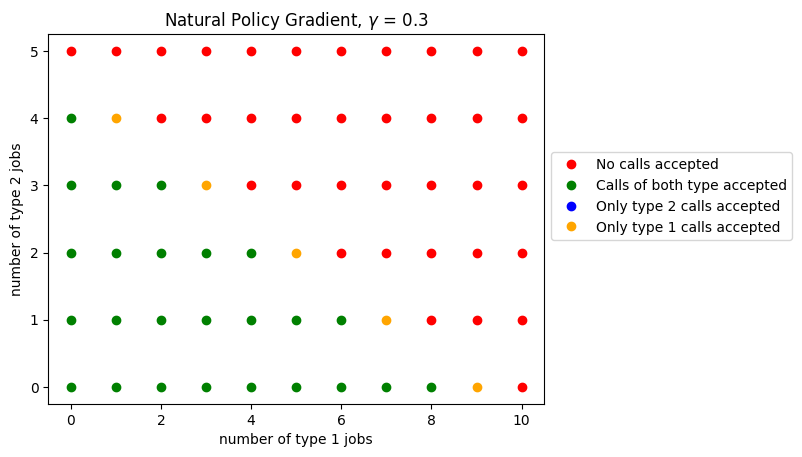

In [51]:
accept_prob = 0.5;
gamma_array = [0.6, 0.3];

for gamma in gamma_array:
    print(f"NPG for gamma = {gamma}");
    accept_policy = np.ones((gpu_npg.max_job1+1,gpu_npg.max_job2+1,3,3))*accept_prob;
    pol_npg = NPG(gpu_npg, init_accept_policy=accept_policy, beta=0.1,gamma=gamma,eps=lambda x: 0.01, max_td_iters=2000000, max_iters=7);
    pol_npg_det = (pol_npg > 0.5)*1; #make the NPG policy deterministic by determining action as 1 if the probability is greater than 1
    print(pol_npg_det[8, 0, 0, 0])
    plotResults(pol_npg_det, title=f'Natural Policy Gradient, $\gamma$ = {gamma}');